In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing #通过移除均值并缩放到单位方差来标准化特征

import os

import lightgbm as lgb

In [4]:
ML = r"C:\Users\jzhuang\Desktop\projects\Github\Noise-Complaints-Prediction\finalproject\Technical documentation\data"
os.listdir(ML) 

['50m buffer landcover result.csv',
 'mask_rcnn_merged.csv',
 'MH_STREET.csv',
 'pspnet_merged.csv',
 'train_Micomobilit.csv',
 'train_normal.csv']

In [5]:
# 讀取electricity_cleaned.cs
GSV= pd.read_csv(os.path.join(ML,'train_Micomobilit.csv'))
GSV.head(20)

ID  accidents_M  injury_M  accidents  injury  building      sky  \
0   7439            0         0          0       0    0.0000   0.0000   
1   7438            0         0          0       0    0.0000   0.0000   
2   7437            0         0          0       0    0.0000   3.3570   
3   7436            0         0          0       0    0.0000   0.0000   
4   7435            0         0          0       0    0.0000   5.7227   
5   7434            0         0          0       0   31.3590  14.8328   
6   7433            0         0          0       0    0.0012   5.3344   
7   7432            0         0          3       0    0.0000   0.0000   
8   7431            0         0          0       0   46.4148   5.1973   
9   7430            1         2          1       2    0.0000   0.0000   
10  7429            0         0          0       0    0.0000   0.0000   
11  7428            0         0          0       0    0.0000   0.0000   
12  7427            0         0          1       0    0.0000   0.0000   
13  7426            0         0          1       0    2.7715   0.0000   
14  7425            0         0          0       0    0.0000   1.8060   
15  7424            0         0          0       0    0.0000   0.0000   
16  7423            0         0          0       0    0.0000  14.4730   
17  7422            0         0          0       0   14.1143  22.7340   
18  7421            0         0          0       0   15.3754  31.5035   
19  7420            0         0          0       0   18.5656  13.6258   

       tree     road  sidewalk  ...  stop sign  dog  Tree Canopy Percentage  \
0    0.0000   0.0000    0.0000  ...   0.000000  0.0               59.408676   
1    0.0000   0.0000    0.0000  ...   0.000000  0.0               40.540665   
2   85.4688   0.0000    0.0000  ...   0.000000  0.0               64.122652   
3    0.0000   0.0000    0.0000  ...   0.000000  0.0               20.597555   
4   48.1555  29.2090    1.8043  ...   0.000000  0.0               51.439843   
5    5.2137  31.4305    0.0000  ...   0.000000  0.0                0.000000   
6   48.2160  24.5648    0.0000  ...   0.000000  0.0               45.526187   
7    0.0000   0.0000    0.0000  ...   0.000000  0.0                0.000000   
8    6.8480   2.8469    0.7277  ...   0.000000  0.0               32.401770   
9    0.0000   0.0000    0.0000  ...   0.000000  0.0               36.795669   
10   0.0000   0.0000    0.0000  ...   0.000000  0.0               65.937122   
11   0.0000   0.0000    0.0000  ...   0.000000  0.0               16.687762   
12   0.0000   0.0000    0.0000  ...   0.000000  0.0                6.308146   
13   0.0000  14.0258    0.0000  ...   0.000000  0.0                2.880609   
14  37.8987   0.9594    0.0000  ...   0.000000  0.0               46.678246   
15   0.0000   0.0000    0.0000  ...   0.000000  0.0               64.002550   
16  37.2402  41.3555    1.6230  ...   0.000000  0.0               33.383838   
17  10.0602  29.4234    0.0475  ...   0.666667  0.0                5.739969   
18   9.2125  28.8340    0.1426  ...   0.000000  0.0               12.651745   
19  20.5902  22.5910    6.2551  ...   0.000000  0.0               18.491145   

    Grass/Shrubs Percentage  Bare Soil Percentage  Water Percentage  \
0                  2.158976               0.00000          0.000000   
1                 13.007276               0.00000          0.000000   
2                  1.457858               0.00000          0.000000   
3                 51.224582               0.00000          0.000000   
4                 11.196312               0.00000          0.000000   
5                  0.000000               0.00000          0.000000   
6                  3.728716               0.00000          0.000000   
7                  2.038969               0.00000          0.000000   
8                  6.227770               0.00000          0.000000   
9                 10.448906               0.00000          0.000000   
10                 4.569433    

### 2 Exploratory data analysis (EDA) of the dataset

#### 2.1 Distribution of target variables

c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


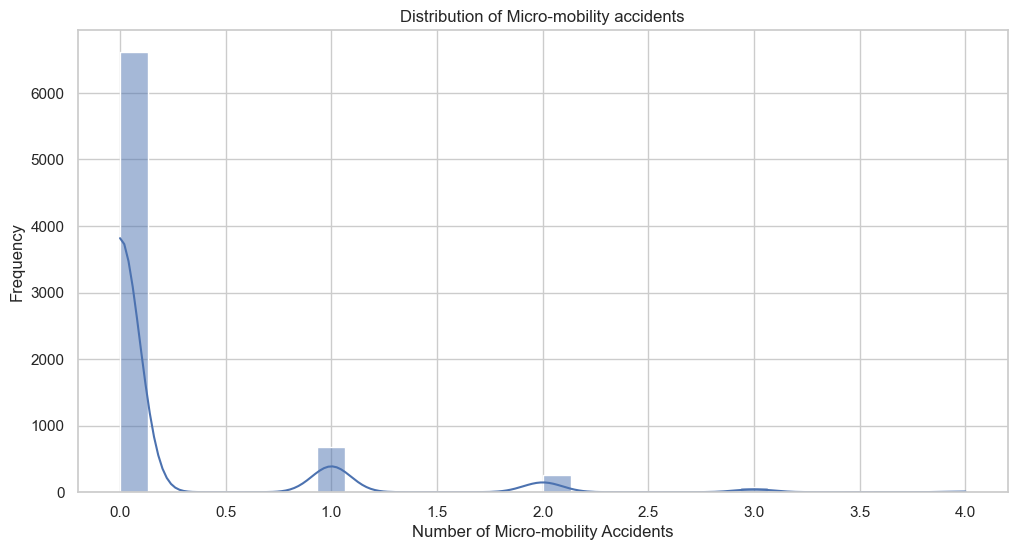

Mean: 0.19145030159979018
Median: 0.0
Skewness: 3.369805205432063
Kurtosis: 12.495593850248685


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

Target_Data= pd.read_csv(os.path.join(ML,'train_Micomobilit.csv'))


# Visualization
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.histplot(Target_Data['accidents_M'], kde=True, bins=30)
plt.title('Distribution of Micro-mobility accidents')
plt.xlabel('Number of Micro-mobility Accidents')
plt.ylabel('Frequency')
plt.show()

# Basic statistics
mean_val = Target_Data['accidents_M'].mean()
median_val = Target_Data['accidents_M'].median()
skewness_val = Target_Data['accidents_M'].skew()
kurtosis_val = Target_Data['accidents_M'].kurt()

print(f"Mean: {mean_val}")
print(f"Median: {median_val}")
print(f"Skewness: {skewness_val}")
print(f"Kurtosis: {kurtosis_val}")


In [7]:
# 讀取electricity_cleaned.cs
GSV_N= pd.read_csv(os.path.join(ML,'train_normal.csv'))
GSV_N.head(20)

ID  Tree Canopy Percentage  Grass/Shrubs Percentage  \
0   7439               59.408676                 2.158976   
1   7438               40.540665                13.007276   
2   7437               64.122652                 1.457858   
3   7436               20.597555                51.224582   
4   7435               51.439843                11.196312   
5   7434                0.000000                 0.000000   
6   7433               45.526187                 3.728716   
7   7432                0.000000                 2.038969   
8   7431               32.401770                 6.227770   
9   7430               36.795669                10.448906   
10  7429               65.937122                 4.569433   
11  7428               16.687762                 5.574597   
12  7427                6.308146                 2.097172   
13  7426                2.880609                 0.925712   
14  7425               46.678246                 6.679539   
15  7424               64.002550                 7.159025   
16  7423               33.383838                 1.305420   
17  7422                5.739969                 0.461008   
18  7421               12.651745                 0.667772   
19  7420               18.491145                 9.499173   

    Bare Soil Percentage  Water Percentage  Buildings Percentage  \
0                0.00000          0.000000              0.000000   
1                0.00000          0.000000              0.000000   
2                0.00000          0.000000              1.312811   
3                0.00000          0.000000              0.000000   
4                0.00000          0.000000              0.000000   
5                0.00000          0.000000              0.000000   
6                0.00000          0.000000              0.000000   
7                0.00000          0.000000             29.600613   
8                0.00000          0.000000              0.000000   
9                0.00000          0.000000              0.000000   
10               0.00000          0.000000              0.000000   
11               0.00000          0.000000              0.032335   
12               0.00000          0.000000              0.000000   
13               0.00000          0.000000              0.000000   
14               6.25179          0.000000              0.000000   
15               0.00000          0.000000              0.000000   
16               0.00000          0.000000              0.000000   
17               0.00000          0.584806              0.000000   
18               0.00000          0.479875              0.000000   
19               0.00000          0.000000              0.000000   

    Roads Percentage  Other Impervious Percentage  Railroads Percentage  \
0           9.941052                     6.345215                   0.0   
1           0.000000                    24.303215                   0.0   
2           3.568888                     7.620033                   0.0   
3           0.898920                     5.366728                   0.0   
4           8.492161                     6.954851                   0.0   
5          51.817703                    26.262692                   0.0   
6          13.450541                    15.368483                   0.0   
7          33.774633                    12.661561                   0.0   
8          15.329681                    24.131337                   0.0   
9          21.186057                     9.656230                   0.0   
10          5.831432                     1.743332                   0.0   
11         53.603533                     2.189558                   0.0   
12         66.949677                     2.702303                   0.0   
13         70.527804                     3.753661                   0.0   
14         14.329136                     4.150922                   0.0   
15          5.294667                     1.623230                   0.0   
16         33.713657

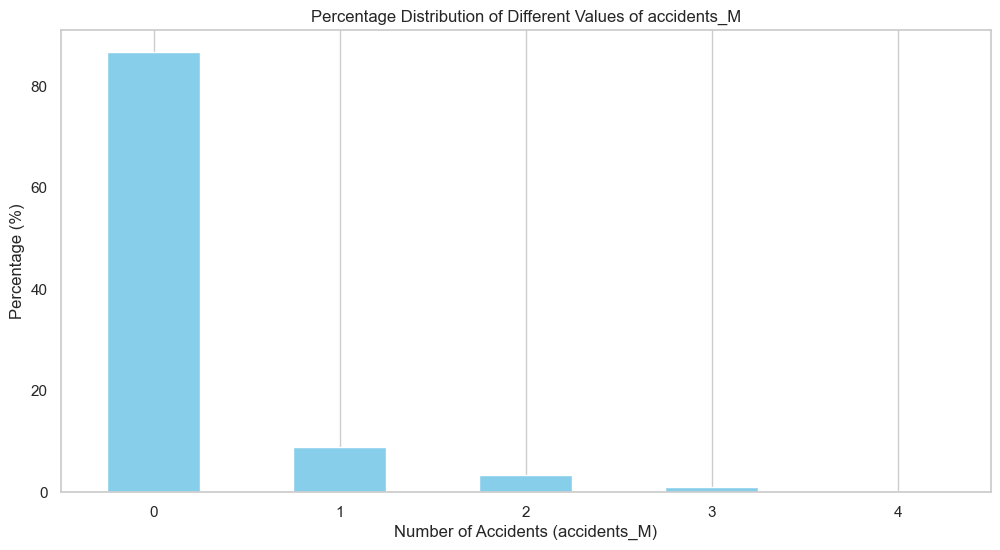

In [8]:
import pandas as pd
import matplotlib.pyplot as plt



# Calculate the percentage distribution of different values of accidents_M
value_counts = Target_Data['accidents_M'].value_counts(normalize=True) * 100

# Plotting
plt.figure(figsize=(12, 6))
value_counts.sort_index().plot(kind='bar', color='skyblue')
plt.title('Percentage Distribution of Different Values of accidents_M')
plt.xlabel('Number of Accidents (accidents_M)')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


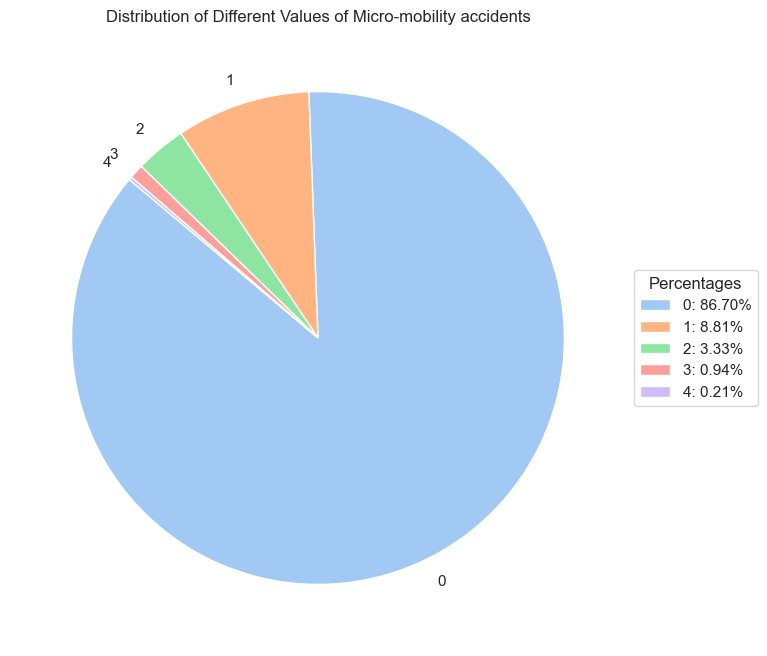

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Calculate the value counts and percentages
value_counts = Target_Data['accidents_M'].value_counts()
percentages = value_counts / len(Target_Data) * 100

# Plotting the pie chart
fig, ax = plt.subplots(figsize=(12, 8))
wedges, texts, _ = ax.pie(value_counts, labels=value_counts.index, startangle=140, autopct='', colors=sns.color_palette("pastel"))

# Adding custom legend for percentages
legend_labels = [f"{value_counts.index[i]}: {percentage:.2f}%" for i, percentage in enumerate(percentages)]
ax.legend(wedges, legend_labels, title="Percentages", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Distribution of Different Values of Micro-mobility accidents')
plt.show()


c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


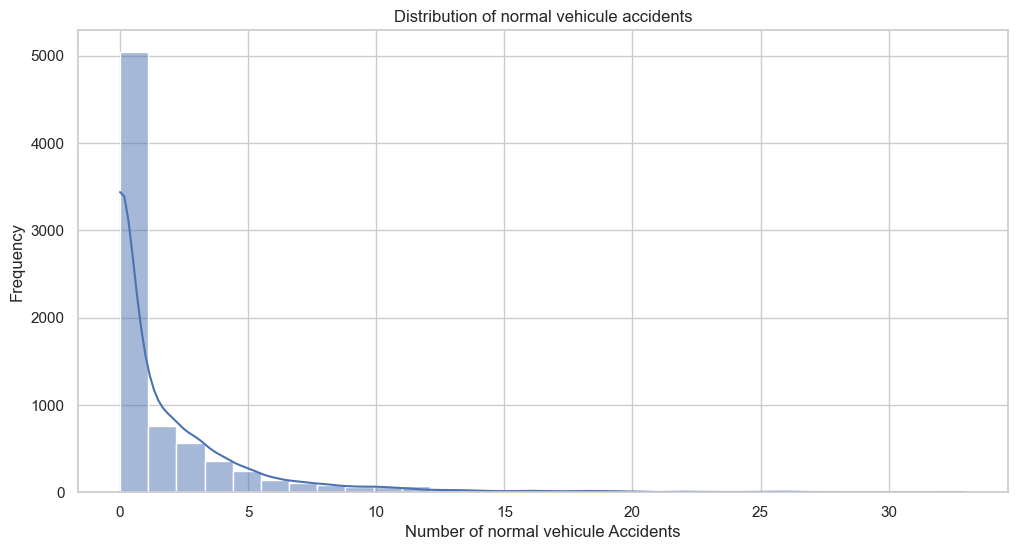

Mean: 1.7701285077366902
Median: 0.0
Skewness: 3.3055010660209954
Kurtosis: 15.1040847111217


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


# Visualization
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.histplot(GSV_N['accidents'], kde=True, bins=30)
plt.title('Distribution of normal vehicule accidents')
plt.xlabel('Number of normal vehicule Accidents')
plt.ylabel('Frequency')
plt.show()

# Basic statistics
mean_val = GSV_N['accidents'].mean()
median_val = GSV_N['accidents'].median()
skewness_val = GSV_N['accidents'].skew()
kurtosis_val = GSV_N['accidents'].kurt()

print(f"Mean: {mean_val}")
print(f"Median: {median_val}")
print(f"Skewness: {skewness_val}")
print(f"Kurtosis: {kurtosis_val}")


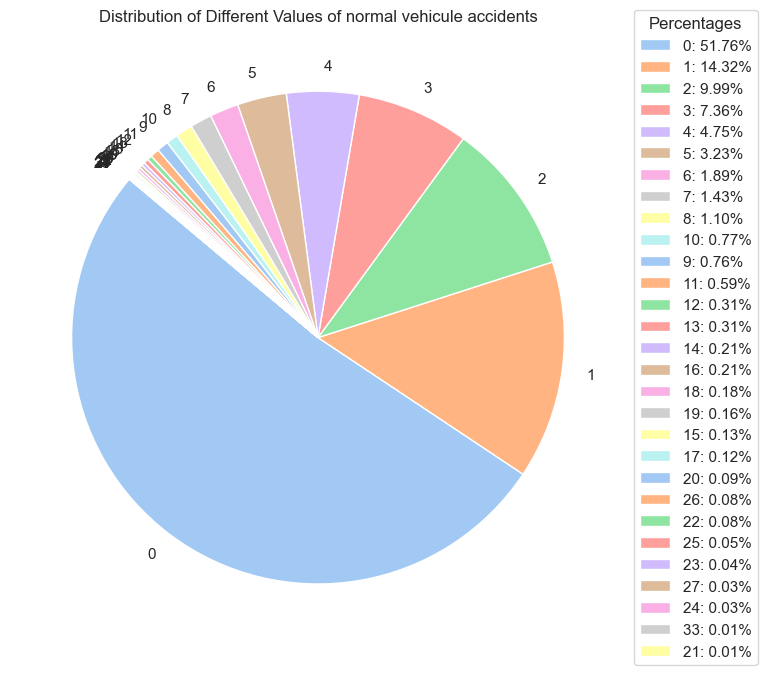

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Calculate the value counts and percentages
value_counts = GSV_N['accidents'].value_counts()
percentages = value_counts / len(Target_Data) * 100

# Plotting the pie chart
fig, ax = plt.subplots(figsize=(12, 8))
wedges, texts, _ = ax.pie(value_counts, labels=value_counts.index, startangle=140, autopct='', colors=sns.color_palette("pastel"))

# Adding custom legend for percentages
legend_labels = [f"{value_counts.index[i]}: {percentage:.2f}%" for i, percentage in enumerate(percentages)]
ax.legend(wedges, legend_labels, title="Percentages", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Distribution of Different Values of normal vehicule accidents')
plt.show()


### 2.2Landcover Corr

In [19]:
selected_columns_Landcover = ['accidents_M','Tree Canopy Percentage', 'Grass/Shrubs Percentage','Buildings Percentage','Other Impervious Percentage', 'Roads Percentage', 'Railroads Percentage'] 
GSV_landcover = GSV[selected_columns_Landcover]
GSV_landcover

accidents_M  Tree Canopy Percentage  Grass/Shrubs Percentage  \
0               0               59.408676                 2.158976   
1               0               40.540665                13.007276   
2               0               64.122652                 1.457858   
3               0               20.597555                51.224582   
4               0               51.439843                11.196312   
...           ...                     ...                      ...   
7621            0                1.259227                 0.010163   
7622            0                0.073909                 0.015706   
7623            0                0.155209                 0.000000   
7624            0               15.939431                 0.850879   
7625            0               20.921832                 0.072061   

      Buildings Percentage  Other Impervious Percentage  Roads Percentage  \
0                 0.000000                     6.345215          9.941052   
1                 0.000000                    24.303215          0.000000   
2                 1.312811                     7.620033          3.568888   
3                 0.000000                     5.366728          0.898920   
4                 0.000000                     6.954851          8.492161   
...                    ...                          ...               ...   
7621             31.619257                    21.798579         23.402408   
7622             26.102863                    22.551529         29.342855   
7623             17.279035                    30.490295         30.160475   
7624             11.030016                     8.597482         41.657967   
7625             10.785192                    10.569008         35.740616   

      Railroads Percentage  
0                      0.0  
1                      0.0  
2                      0.0  
3                      0.0  
4                      0.0  
...                    ...  
7621                   0.0  
7622                   0.0  
7623                   0.0  
7624                   0.0  
7625                   0.0  

[7626 rows x 7 columns]

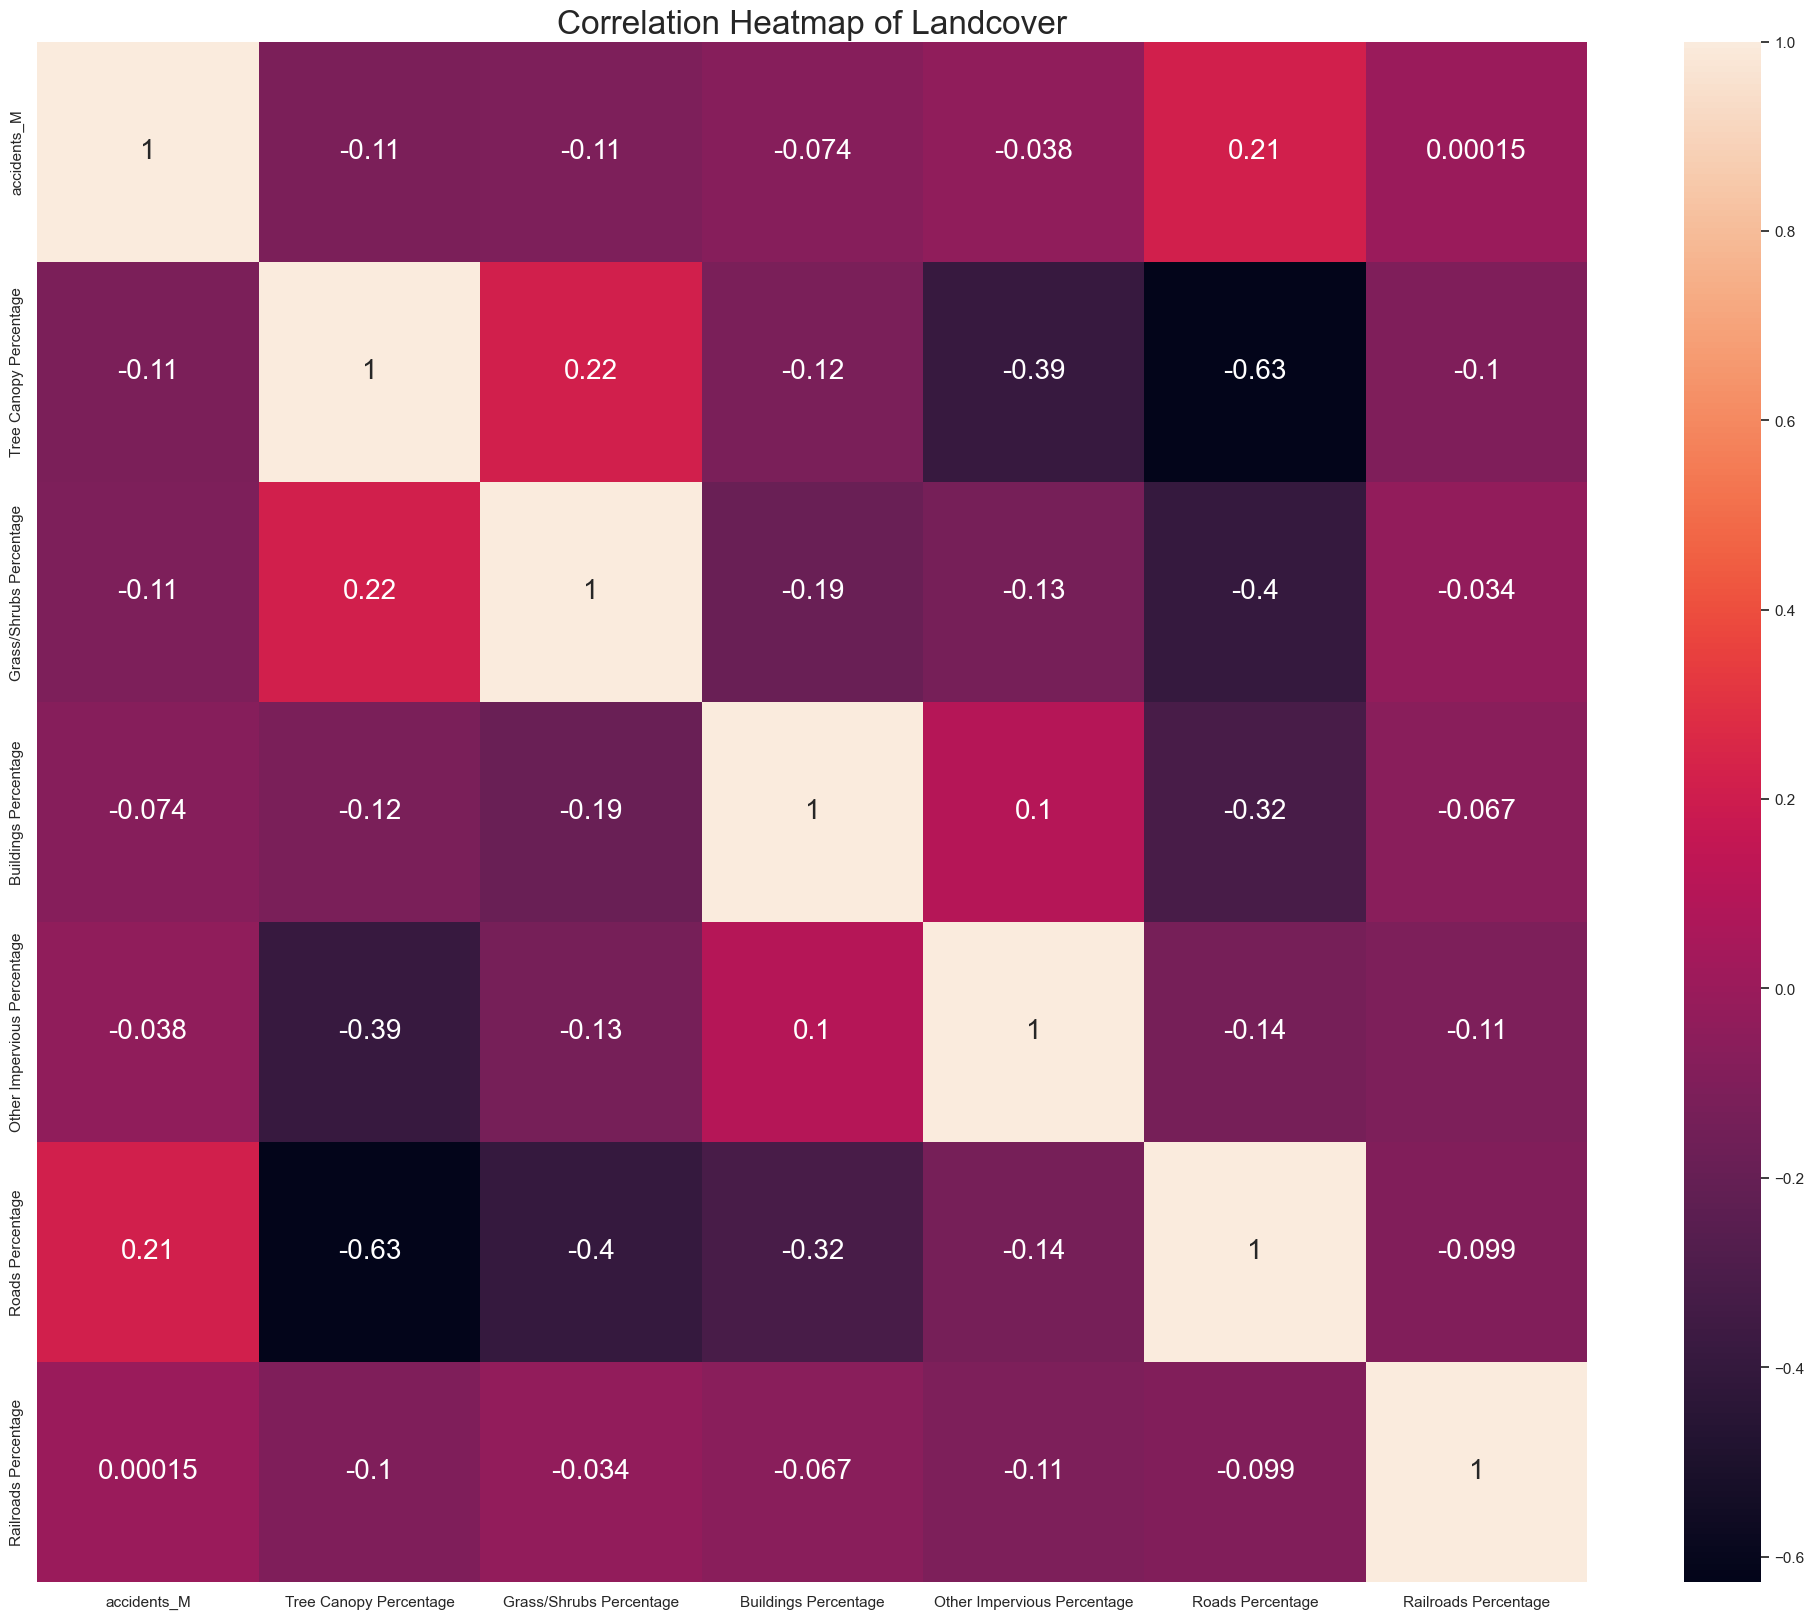

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# 设置图表尺寸
fig, ax = plt.subplots(figsize=(25,20))

# 绘制相关系数热力图
sns.heatmap(GSV_landcover.corr(), annot=True,annot_kws={'size':20})

# 添加标题
plt.title('Correlation Heatmap of Landcover', fontsize=24)

# # 将图表保存为图片
# plt.savefig('Correlation Heatmap of Landcover.png')

# 显示图表
plt.show()


In [14]:
# 获取与'accidents_M'相关的系数
correlations = GSV_landcover.corr()['accidents_M'].drop('accidents_M')

# 找到与'accidents_M'相关性绝对值最高的五个特征
top_5_corr = correlations.abs().nlargest(5)

# 打印结果
print(top_5_corr)

# 获取这五个最大值的索引（即特征名称）
top_5_features = top_5_corr.index.tolist()
print(top_5_features)


Roads Percentage               0.214297
Tree Canopy Percentage         0.113154
Grass/Shrubs Percentage        0.107896
Buildings Percentage           0.074035
Other Impervious Percentage    0.037770
Name: accidents_M, dtype: float64
['Roads Percentage', 'Tree Canopy Percentage', 'Grass/Shrubs Percentage', 'Buildings Percentage', 'Other Impervious Percentage']


c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

Text(0.5, 1.03, 'Pair Plot of Landcover')

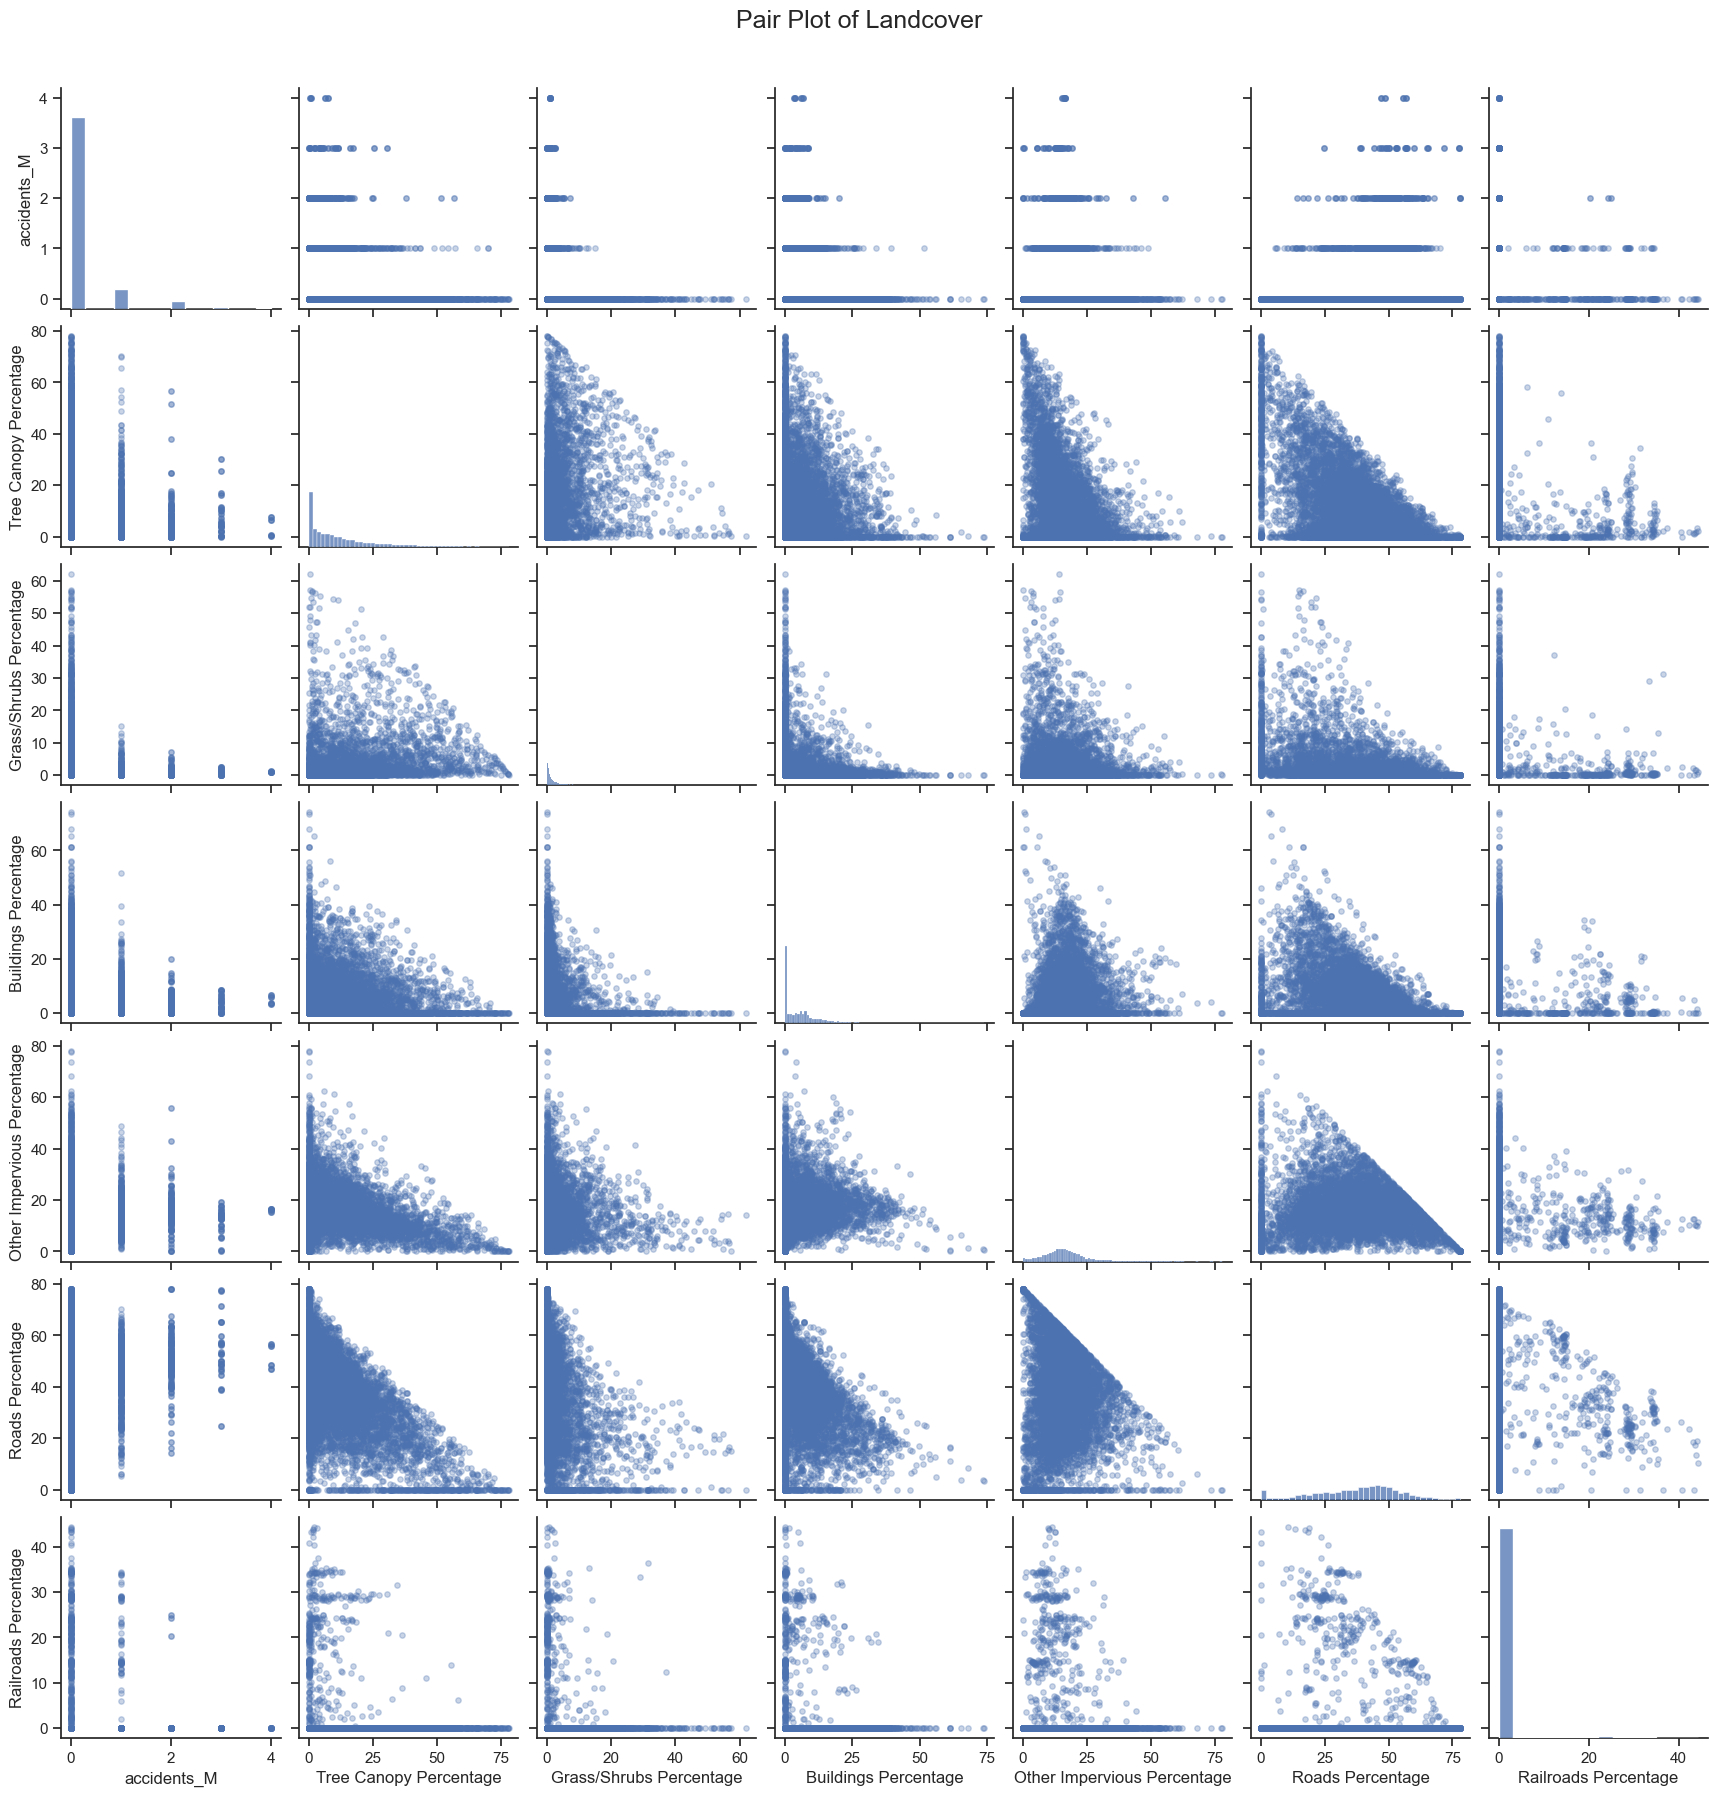

In [15]:
# 设置样式和加载数据集
sns.set_theme(style="ticks")
# 定义 plot_kws 字典，并将透明度 alpha 设置为 0.5
plot_kws = {"s": 15, "edgecolor": "b", "linewidth": 1, "alpha": 0.3}

# 使用 pairplot() 函数绘制子图，并传入 plot_kws 参数字典
g = sns.pairplot(GSV_landcover, plot_kws=plot_kws,palette="coolwarm")

# 添加标题
plt.suptitle("Pair Plot of Landcover", y=1.03, fontsize=18)

# 保存图表
# g.savefig("Pair Plot of Landcover.jpg")

 #### 2.1 Define sample feature 

In [20]:
land_cover_features = ['Roads Percentage', 'Tree Canopy Percentage', 'Grass/Shrubs Percentage', 'Buildings Percentage', 'Other Impervious Percentage']

In [21]:
# Refine the plots and split them into separate figures for each feature group

# Function to plot feature distributions
def plot_feature_group(features, title):
    plt.figure(figsize=(20, 4))
    for i, feature in enumerate(features, 1):
        plt.subplot(1, 5, i)
        sns.histplot(GSV[feature], bins=30, kde=True)
        plt.title(f'Distribution of {feature}')
        plt.xlabel(f'{feature} (%)')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)
    plt.suptitle(title, fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

# Plot distributions for each feature group
plot_feature_group(street_image_features, "Distribution of Street Image Segmentation Features")
# plot_feature_group(object_count_features, "Distribution of Object Detection Count Features")
# plot_feature_group(land_use_features, "Distribution of Land Use Percentage Features")

NameError: name 'street_image_features' is not defined

### 2.3 Street view segementation Corr (Psp Net)

In [22]:
selected_columns_Psp = ['accidents_M','building', 'sky', 'tree', 'road', 'sidewalk', 'person', 'car', 'skyscraper','streetlight', 'wall', 'fence', 'railing', 'awning', 'signboard', 'ashcan', 'earth', 'van','plant', 'bulletin board', 'minibike', 'bridge', 'water'] 
GSV_Psp = GSV[selected_columns_Psp]
GSV_Psp

accidents_M  building     sky     tree     road  sidewalk  person  \
0               0    0.0000  0.0000   0.0000   0.0000    0.0000  0.0000   
1               0    0.0000  0.0000   0.0000   0.0000    0.0000  0.0000   
2               0    0.0000  3.3570  85.4688   0.0000    0.0000  0.0000   
3               0    0.0000  0.0000   0.0000   0.0000    0.0000  0.0000   
4               0    0.0000  5.7227  48.1555  29.2090    1.8043  0.0000   
...           ...       ...     ...      ...      ...       ...     ...   
7621            0    0.0000  0.0000   0.0000   0.0000    0.0000  0.0000   
7622            0   54.7926  2.1094   0.0336  27.9215    4.0379  0.3883   
7623            0    0.0000  0.0000   0.0000   0.0000    0.0000  0.0000   
7624            0    0.0000  0.0000   0.0000   0.0000    0.0000  0.0000   
7625            0   36.0715  2.0207  13.9648  36.5035    1.4016  0.3258   

         car  skyscraper  streetlight  ...  awning  signboard  ashcan   earth  \
0     0.0000      0.0000       0.0000  ...   0.000     0.0000     0.0  0.0000   
1     0.0000      0.0000       0.0000  ...   0.000     0.0000     0.0  0.0000   
2     0.0000      0.0000       0.0000  ...   0.000     0.0000     0.0  5.1691   
3     0.0000      0.0000       0.0000  ...   0.000     0.0000     0.0  0.0000   
4     0.3078      0.0000       0.0574  ...   0.000     0.7805     0.0  1.7918   
...      ...         ...          ...  ...     ...        ...     ...     ...   
7621  0.0000      0.0000       0.0000  ...   0.000     0.0000     0.0  0.0000   
7622  4.6504      0.0000       0.1082  ...   0.398     0.0000     0.0  0.0000   
7623  0.0000      0.0000       0.0000  ...   0.000     0.0000     0.0  0.0000   
7624  0.0000      0.0000       0.0000  ...   0.000     0.0000     0.0  0.0000   
7625  6.3336      2.7258       0.0711  ...   0.000     0.0000     0.0  0.0000   

         van   plant  bulletin board  minibike  bridge   water  
0     0.0000  0.0000             0.0    0.0000     0.0  0.0000  
1     0.0000  0.0000             0.0    0.0000     0.0  0.0000  
2     0.0000  1.3559             0.0    0.0000     0.0  4.0543  
3     0.0000  0.0000             0.0    0.0000     0.0  0.0000  
4     1.5699  0.2914             0.0    0.0000     0.0  0.0000  
...      ...     ...             ...       ...     ...     ...  
7621  0.0000  0.0000             0.0    0.0000     0.0  0.0000  
7622  4.3555  0.0000             0.0    0.0000     0.0  0.0000  
7623  0.0000  0.0000             0.0    0.0000     0.0  0.0000  
7624  0.0000  0.0000             0.0    0.0000     0.0  0.0000  
7625  0.0941  0.0000             0.0    0.1406     0.0  0.0000  

[7626 rows x 23 columns]

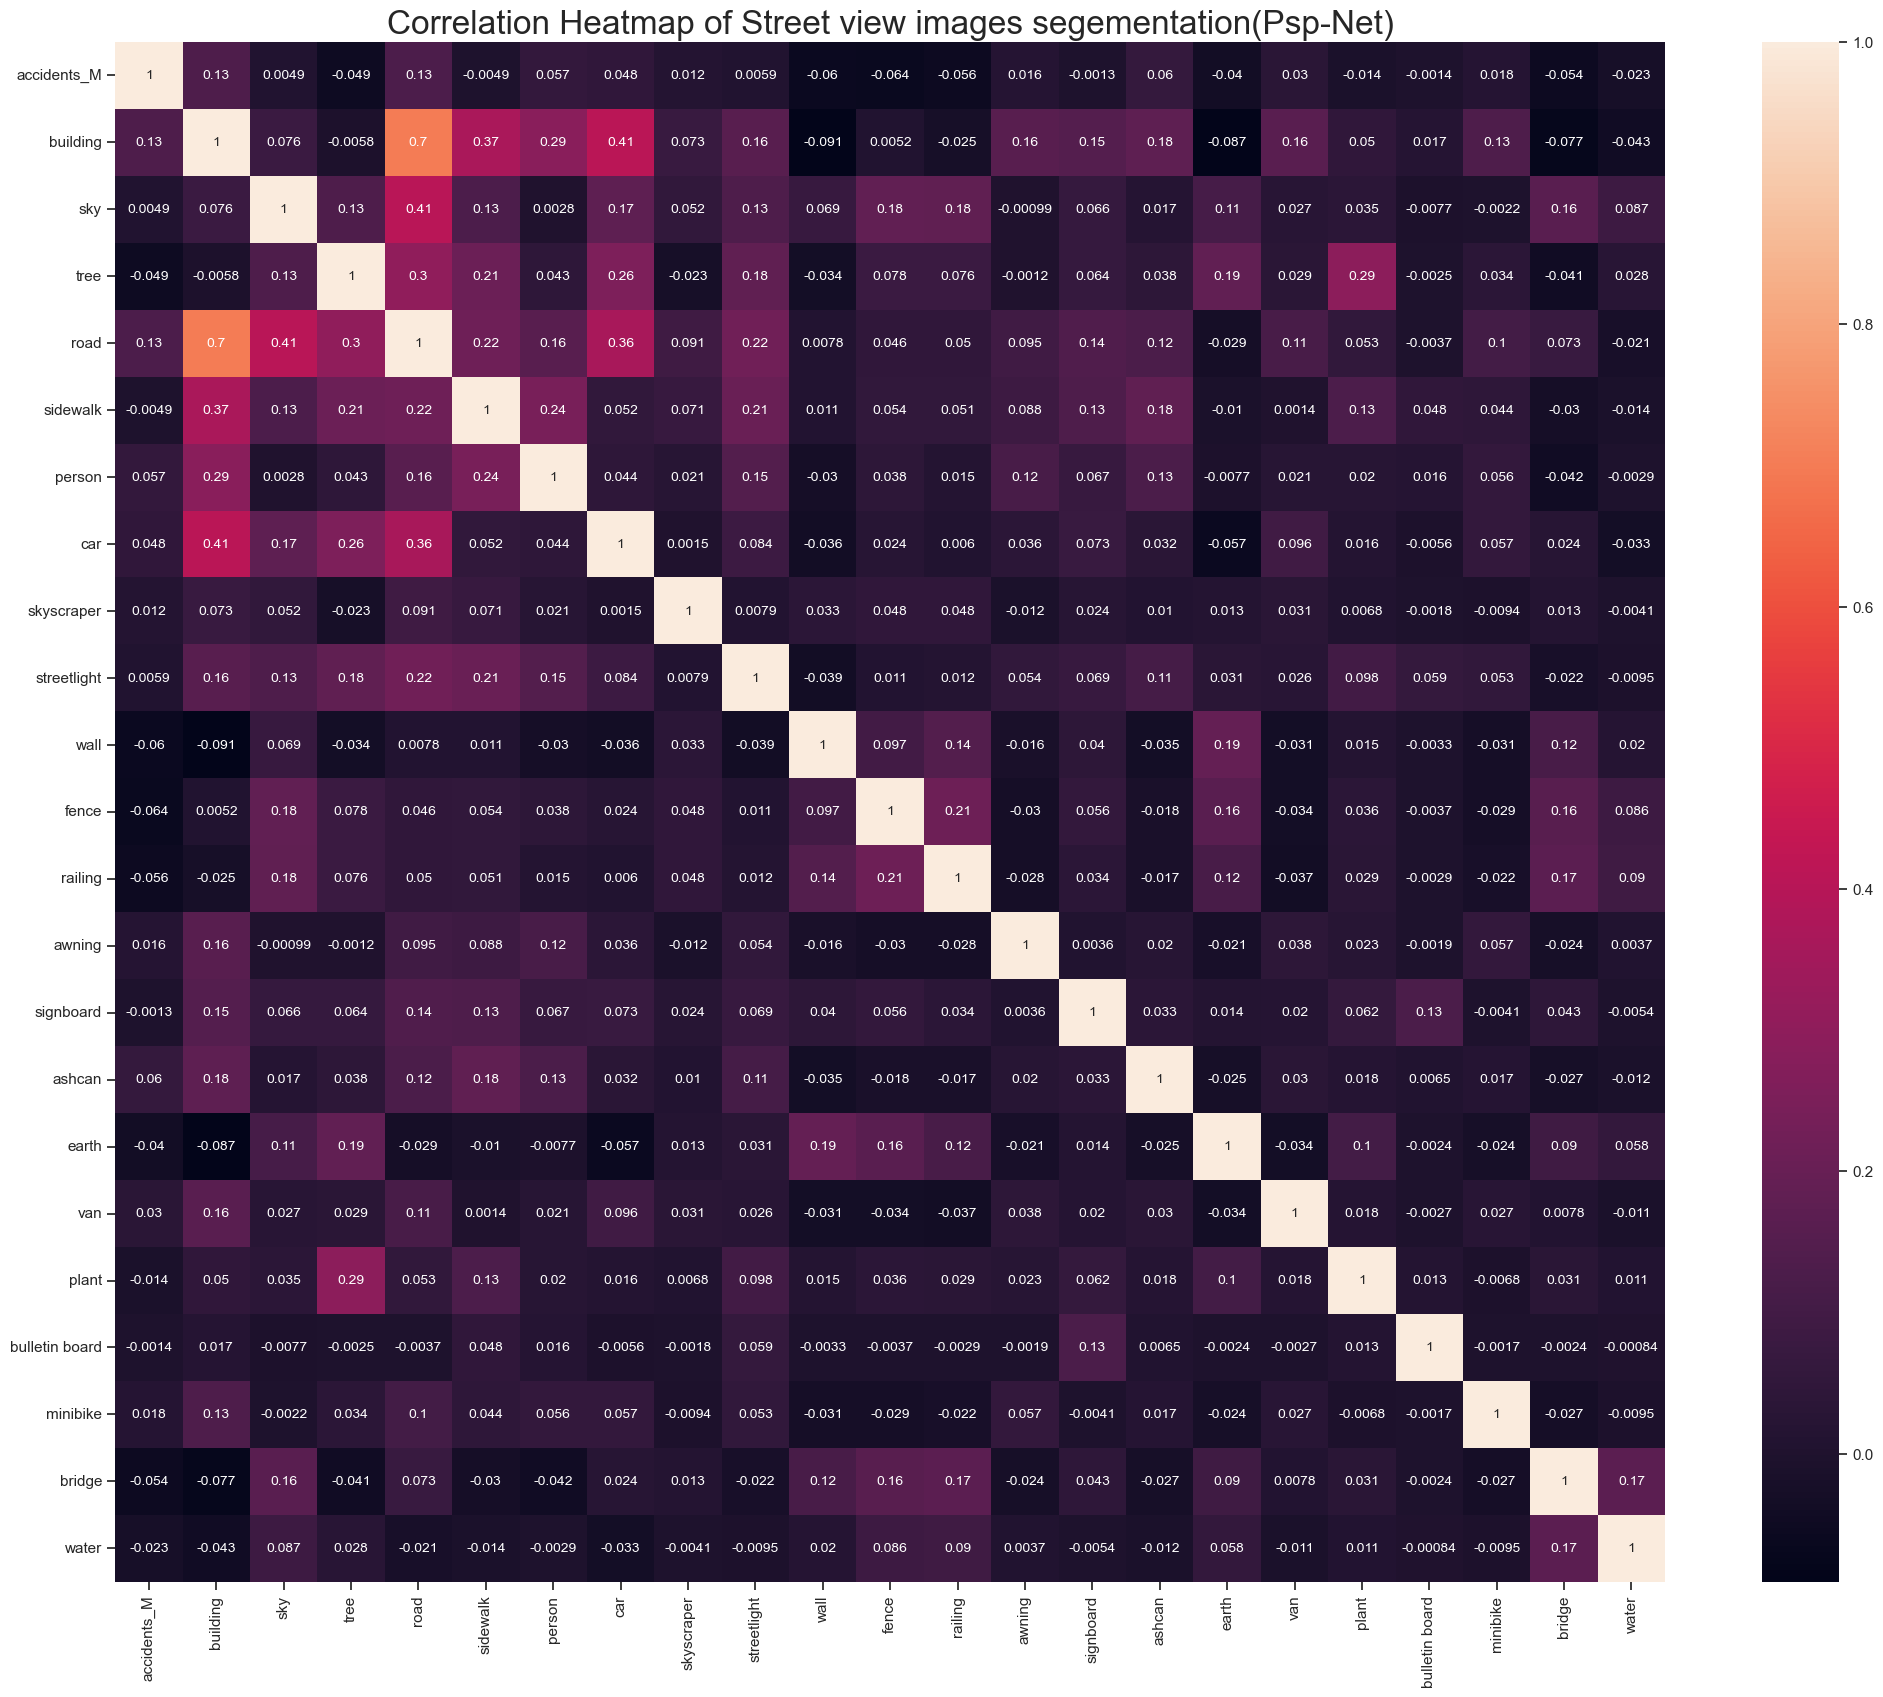

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# 设置图表尺寸
fig, ax = plt.subplots(figsize=(25,20))

# 绘制相关系数热力图
sns.heatmap(GSV_Psp.corr(), annot=True,annot_kws={'size':10})

# 添加标题
plt.title('Correlation Heatmap of Street view images segementation(Psp-Net)', fontsize=24)

# 将图表保存为图片()
plt.savefig('Correlation Heatmap of Street view images segementation(Psp-Net).png')

# 显示图表
plt.show()

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# 设置样式和加载数据集
sns.set_theme(style="ticks")
# 定义 plot_kws 字典，并将透明度 alpha 设置为 0.5
plot_kws = {"s": 15, "edgecolor": "b", "linewidth": 1, "alpha": 0.3}

# 使用 pairplot() 函数绘制子图，并传入 plot_kws 参数字典
g = sns.pairplot(GSV_Psp, plot_kws=plot_kws,palette="coolwarm")

# 添加标题
plt.suptitle("Pair Plot of GSV Psp-Net", y=1.03, fontsize=18)

# 保存图表
g.savefig("Pair Plot of GSV Psp-Net.jpg")


c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

KeyboardInterrupt: 

In [ ]:
# 获取与'accidents_M'相关的系数
correlations = GSV_Psp.corr()['accidents_M'].drop('accidents_M')

# 找到与'accidents_M'相关性绝对值最高的五个特征
top_5_corr_psp = correlations.abs().nlargest(6)

# 打印结果
print(top_5_corr_psp)

# 获取这五个最大值的索引（即特征名称）
top_5_features = top_5_corr.index.tolist()
print(top_5_features)

building    0.130938
road        0.128583
fence       0.063711
wall        0.060303
ashcan      0.059836
person      0.056704
Name: accidents_M, dtype: float64
['Roads Percentage', 'Tree Canopy Percentage', 'Grass/Shrubs Percentage', 'Buildings Percentage', 'Other Impervious Percentage']


c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

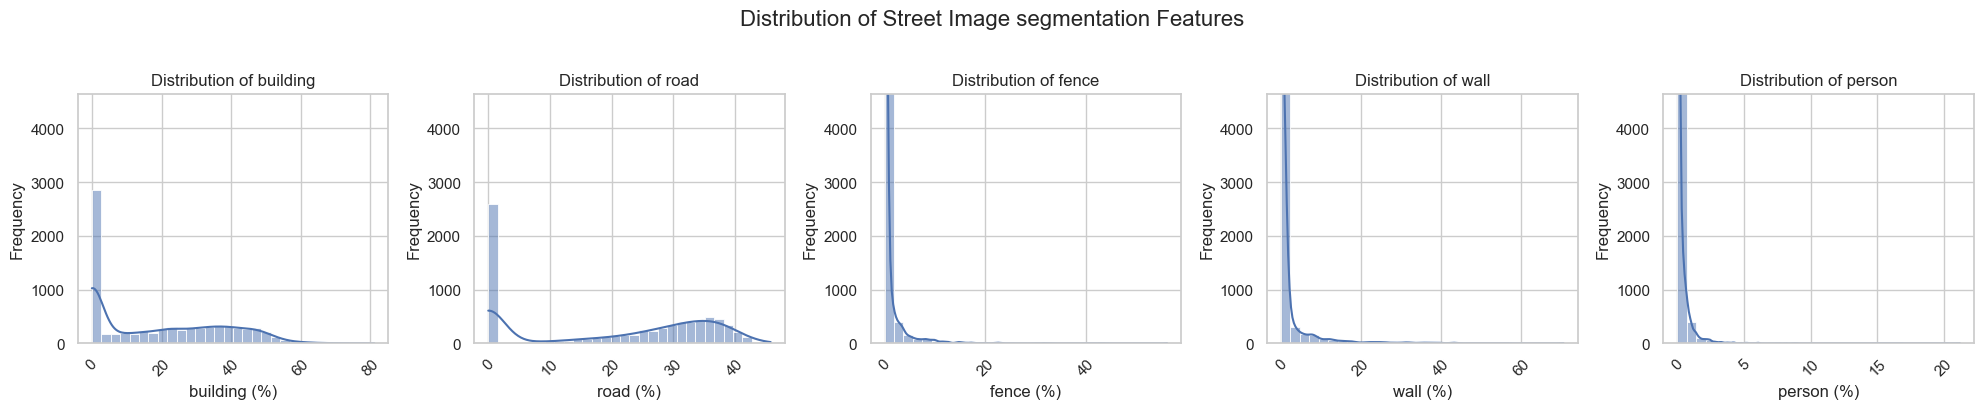

In [ ]:
street_image_feature_psp = ['building', 'road', 'fence', 'wall', 'person']

def plot_feature_group(features, title):
    # 先绘制所有图，找到最大的y值
    max_y = 0
    for feature in features:
        data = GSV[feature].dropna()  # 排除NaN值
        max_y = max(max_y, data.value_counts().max())

    plt.figure(figsize=(20, 4))
    for i, feature in enumerate(features, 1):
        plt.subplot(1, 5, i)
        sns.histplot(GSV[feature], bins=30, kde=True)
        plt.title(f'Distribution of {feature}')
        plt.xlabel(f'{feature} (%)')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)
        plt.ylim(0, max_y)  # 设置y轴的上下限制
    plt.suptitle(title, fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

# Plot distributions for each feature group
plot_feature_group(street_image_feature_psp, "Distribution of Street Image segmentation Features")


#### 2.3 MaskRCNN

In [9]:
selected_columns_rcnn = ['accidents_M','person_number', 
              'car_number', 'bus_number', 'truck_number', 'motorcycle_number', 'traffic light', 'fire hydrant', 'bicycle_number', 
              'bench_number',  'stop sign'] 
GSV_CNN = GSV[selected_columns_rcnn]
GSV_CNN

accidents_M  person_number  car_number  bus_number  truck_number  \
0               0            0.0         0.0         0.0           0.0   
1               0            0.0         0.0         0.0           0.0   
2               0            0.0         0.0         0.0           0.0   
3               0            0.0         0.0         0.0           0.0   
4               0            0.0         4.0         0.0           3.0   
...           ...            ...         ...         ...           ...   
7621            0            0.0         0.0         0.0           0.0   
7622            0           18.0         5.0         0.0           1.0   
7623            0            0.0         0.0         0.0           0.0   
7624            0            0.0         0.0         0.0           0.0   
7625            0            5.0        13.0         0.0           2.0   

      motorcycle_number  traffic light  fire hydrant  bicycle_number  \
0                   0.0            0.0           0.0             0.0   
1                   0.0            0.0           0.0             0.0   
2                   0.0            0.0           0.0             0.0   
3                   0.0            0.0           0.0             0.0   
4                   0.0            0.0           0.0             0.0   
...                 ...            ...           ...             ...   
7621                0.0            0.0           0.0             0.0   
7622                0.0           10.0           0.0             2.0   
7623                0.0            0.0           0.0             0.0   
7624                0.0            0.0           0.0             0.0   
7625                0.0            0.0           0.0             2.0   

      bench_number  stop sign  
0              0.0        0.0  
1              0.0        0.0  
2              0.0        0.0  
3              0.0        0.0  
4              0.0        0.0  
...            ...        ...  
7621           0.0        0.0  
7622           0.0        0.0  
7623           0.0        0.0  
7624           0.0        0.0  
7625           0.0        0.0  

[7626 rows x 11 columns]

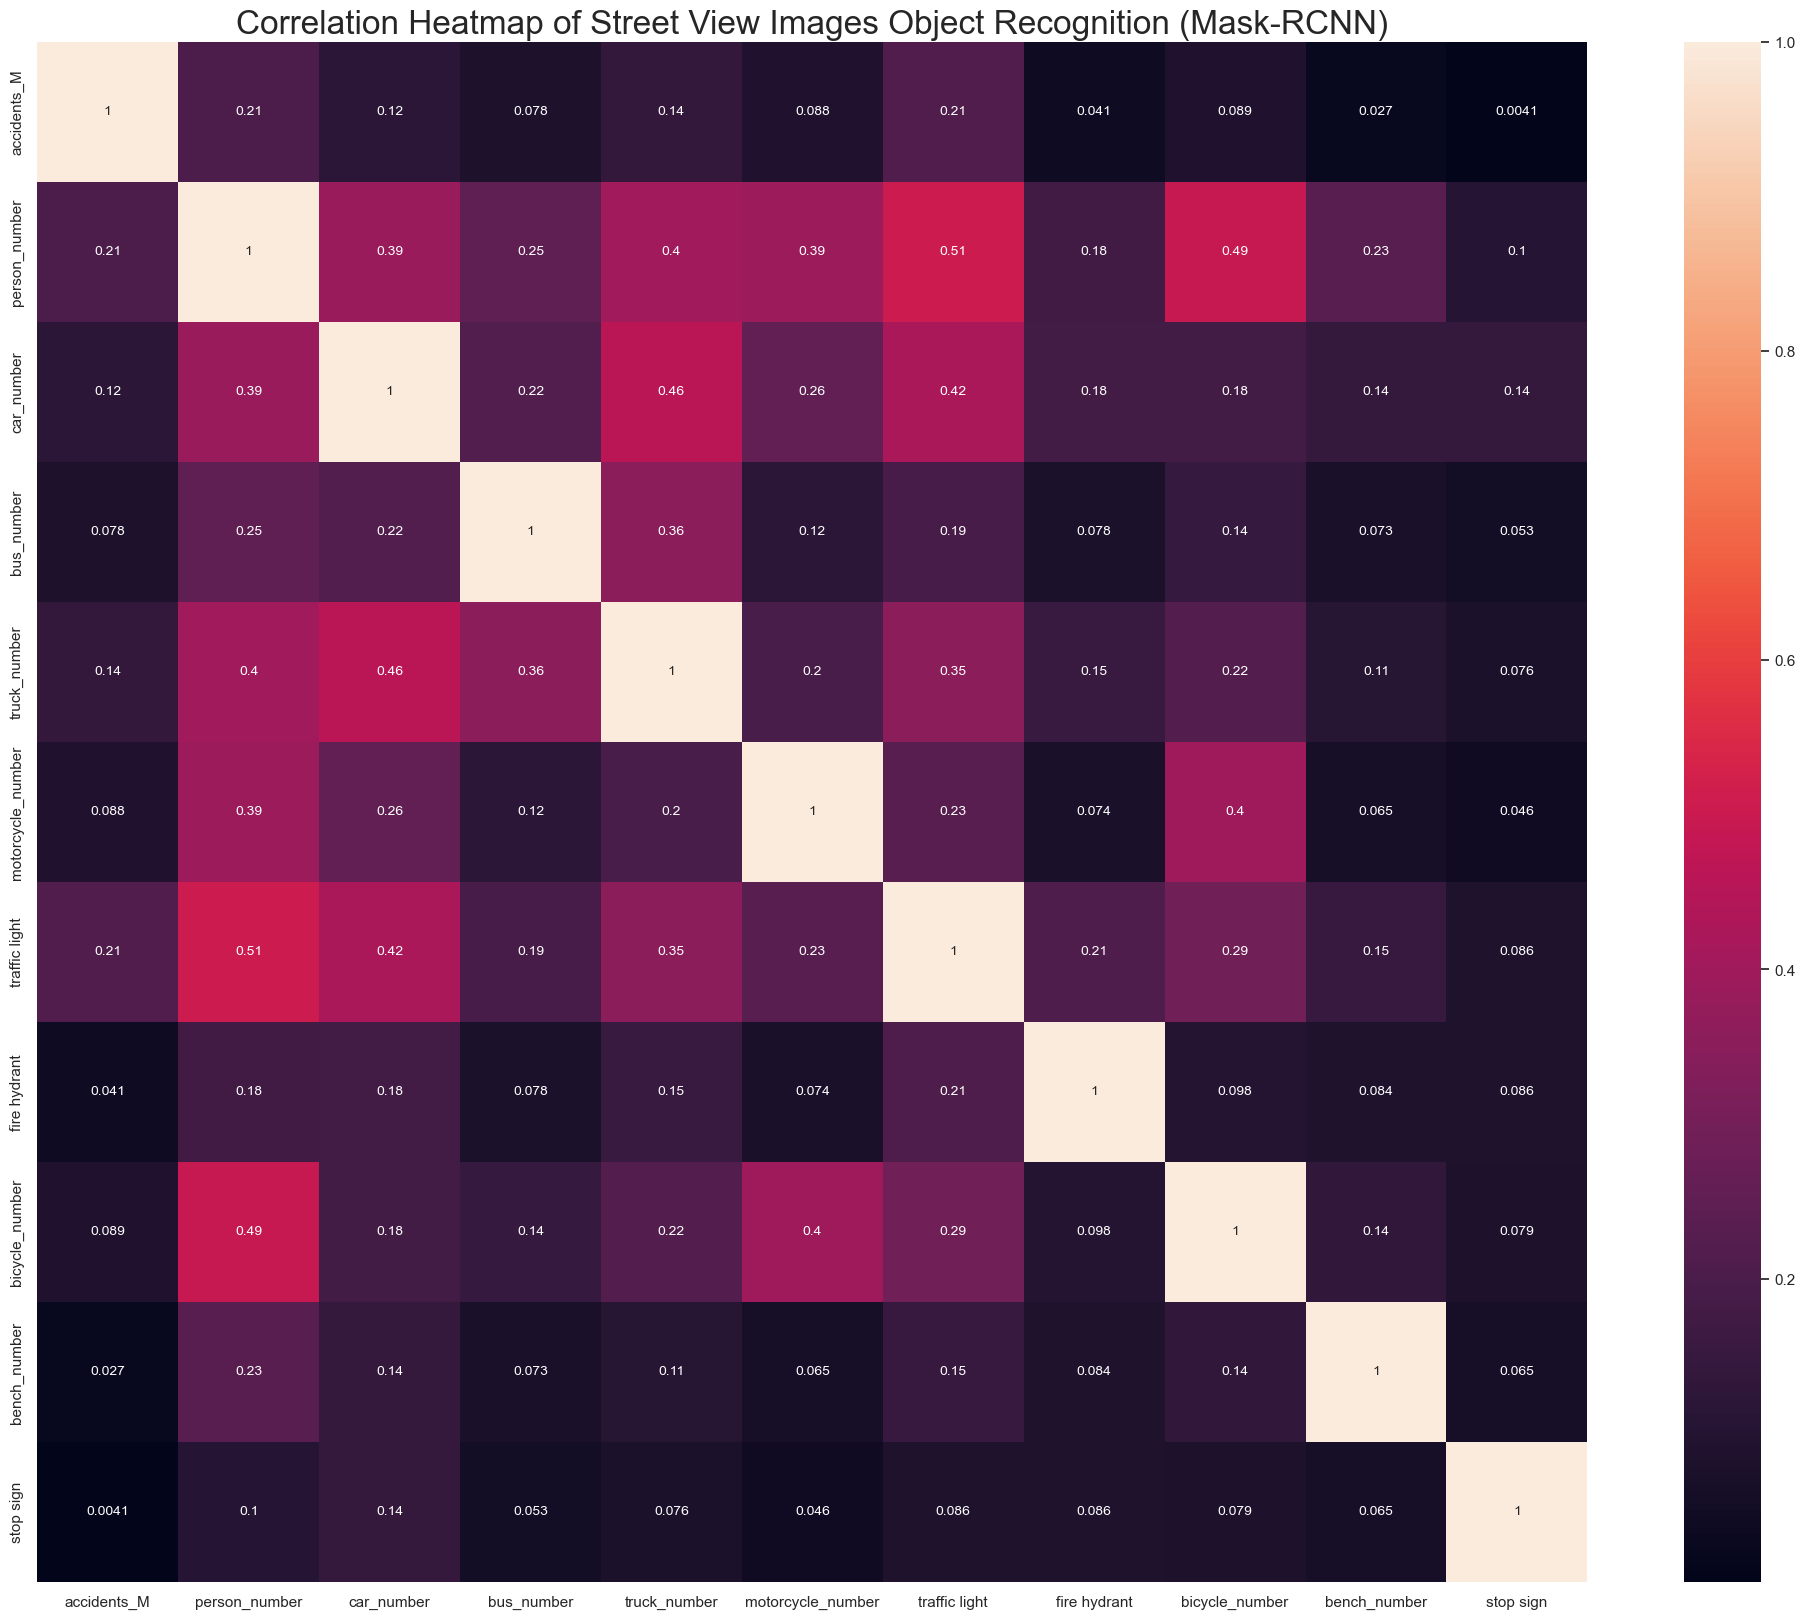

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# 设置图表尺寸
fig, ax = plt.subplots(figsize=(25,20))

# 绘制相关系数热力图
sns.heatmap(GSV_CNN.corr(), annot=True,annot_kws={'size':10})

# 添加标题
plt.title('Correlation Heatmap of Street View Images Object Recognition (Mask-RCNN)', fontsize=24)

# 将图表保存为图片
plt.savefig('Correlation Heatmap of Street View Images Object Recognition (Mask-RCNN)')

# 显示图表
plt.show()

In [25]:
# 获取与'accidents_M'相关的系数
correlations = GSV_CNN.corr()['accidents_M'].drop('accidents_M')

# 找到与'accidents_M'相关性绝对值最高的五个特征
top_5_corr_CNN = correlations.abs().nlargest(5)

# 打印结果
print(top_5_corr_CNN)

# 获取这五个最大值的索引（即特征名称）
top_5_CNN_features = top_5_corr_CNN.index.tolist()
print(top_5_CNN_features)

traffic light     0.211764
person_number     0.205064
truck_number      0.138428
car_number        0.118495
bicycle_number    0.088587
Name: accidents_M, dtype: float64
['traffic light', 'person_number', 'truck_number', 'car_number', 'bicycle_number']


c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

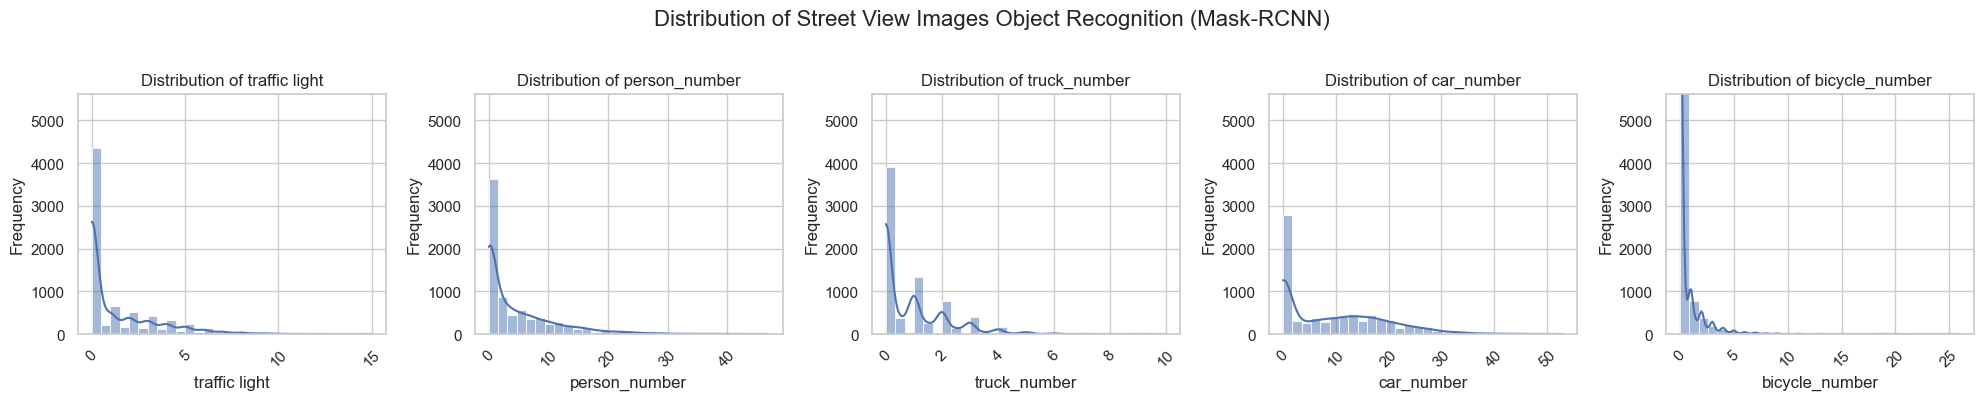

In [26]:
street_image_feature_psp = ['traffic light', 'person_number', 'truck_number', 'car_number', 'bicycle_number']

def plot_feature_group(features, title):
    # 先绘制所有图，找到最大的y值
    max_y = 0
    for feature in features:
        data = GSV[feature].dropna()  # 排除NaN值
        max_y = max(max_y, data.value_counts().max())

    plt.figure(figsize=(20, 4))
    for i, feature in enumerate(features, 1):
        plt.subplot(1, 5, i)
        sns.histplot(GSV[feature], bins=30, kde=True)
        plt.title(f'Distribution of {feature}')
        plt.xlabel(f'{feature}')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)
        plt.ylim(0, max_y)  # 设置y轴的上下限制
    plt.suptitle(title, fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

# Plot distributions for each feature group
plot_feature_group(street_image_feature_psp, "Distribution of Street View Images Object Recognition (Mask-RCNN)")


c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

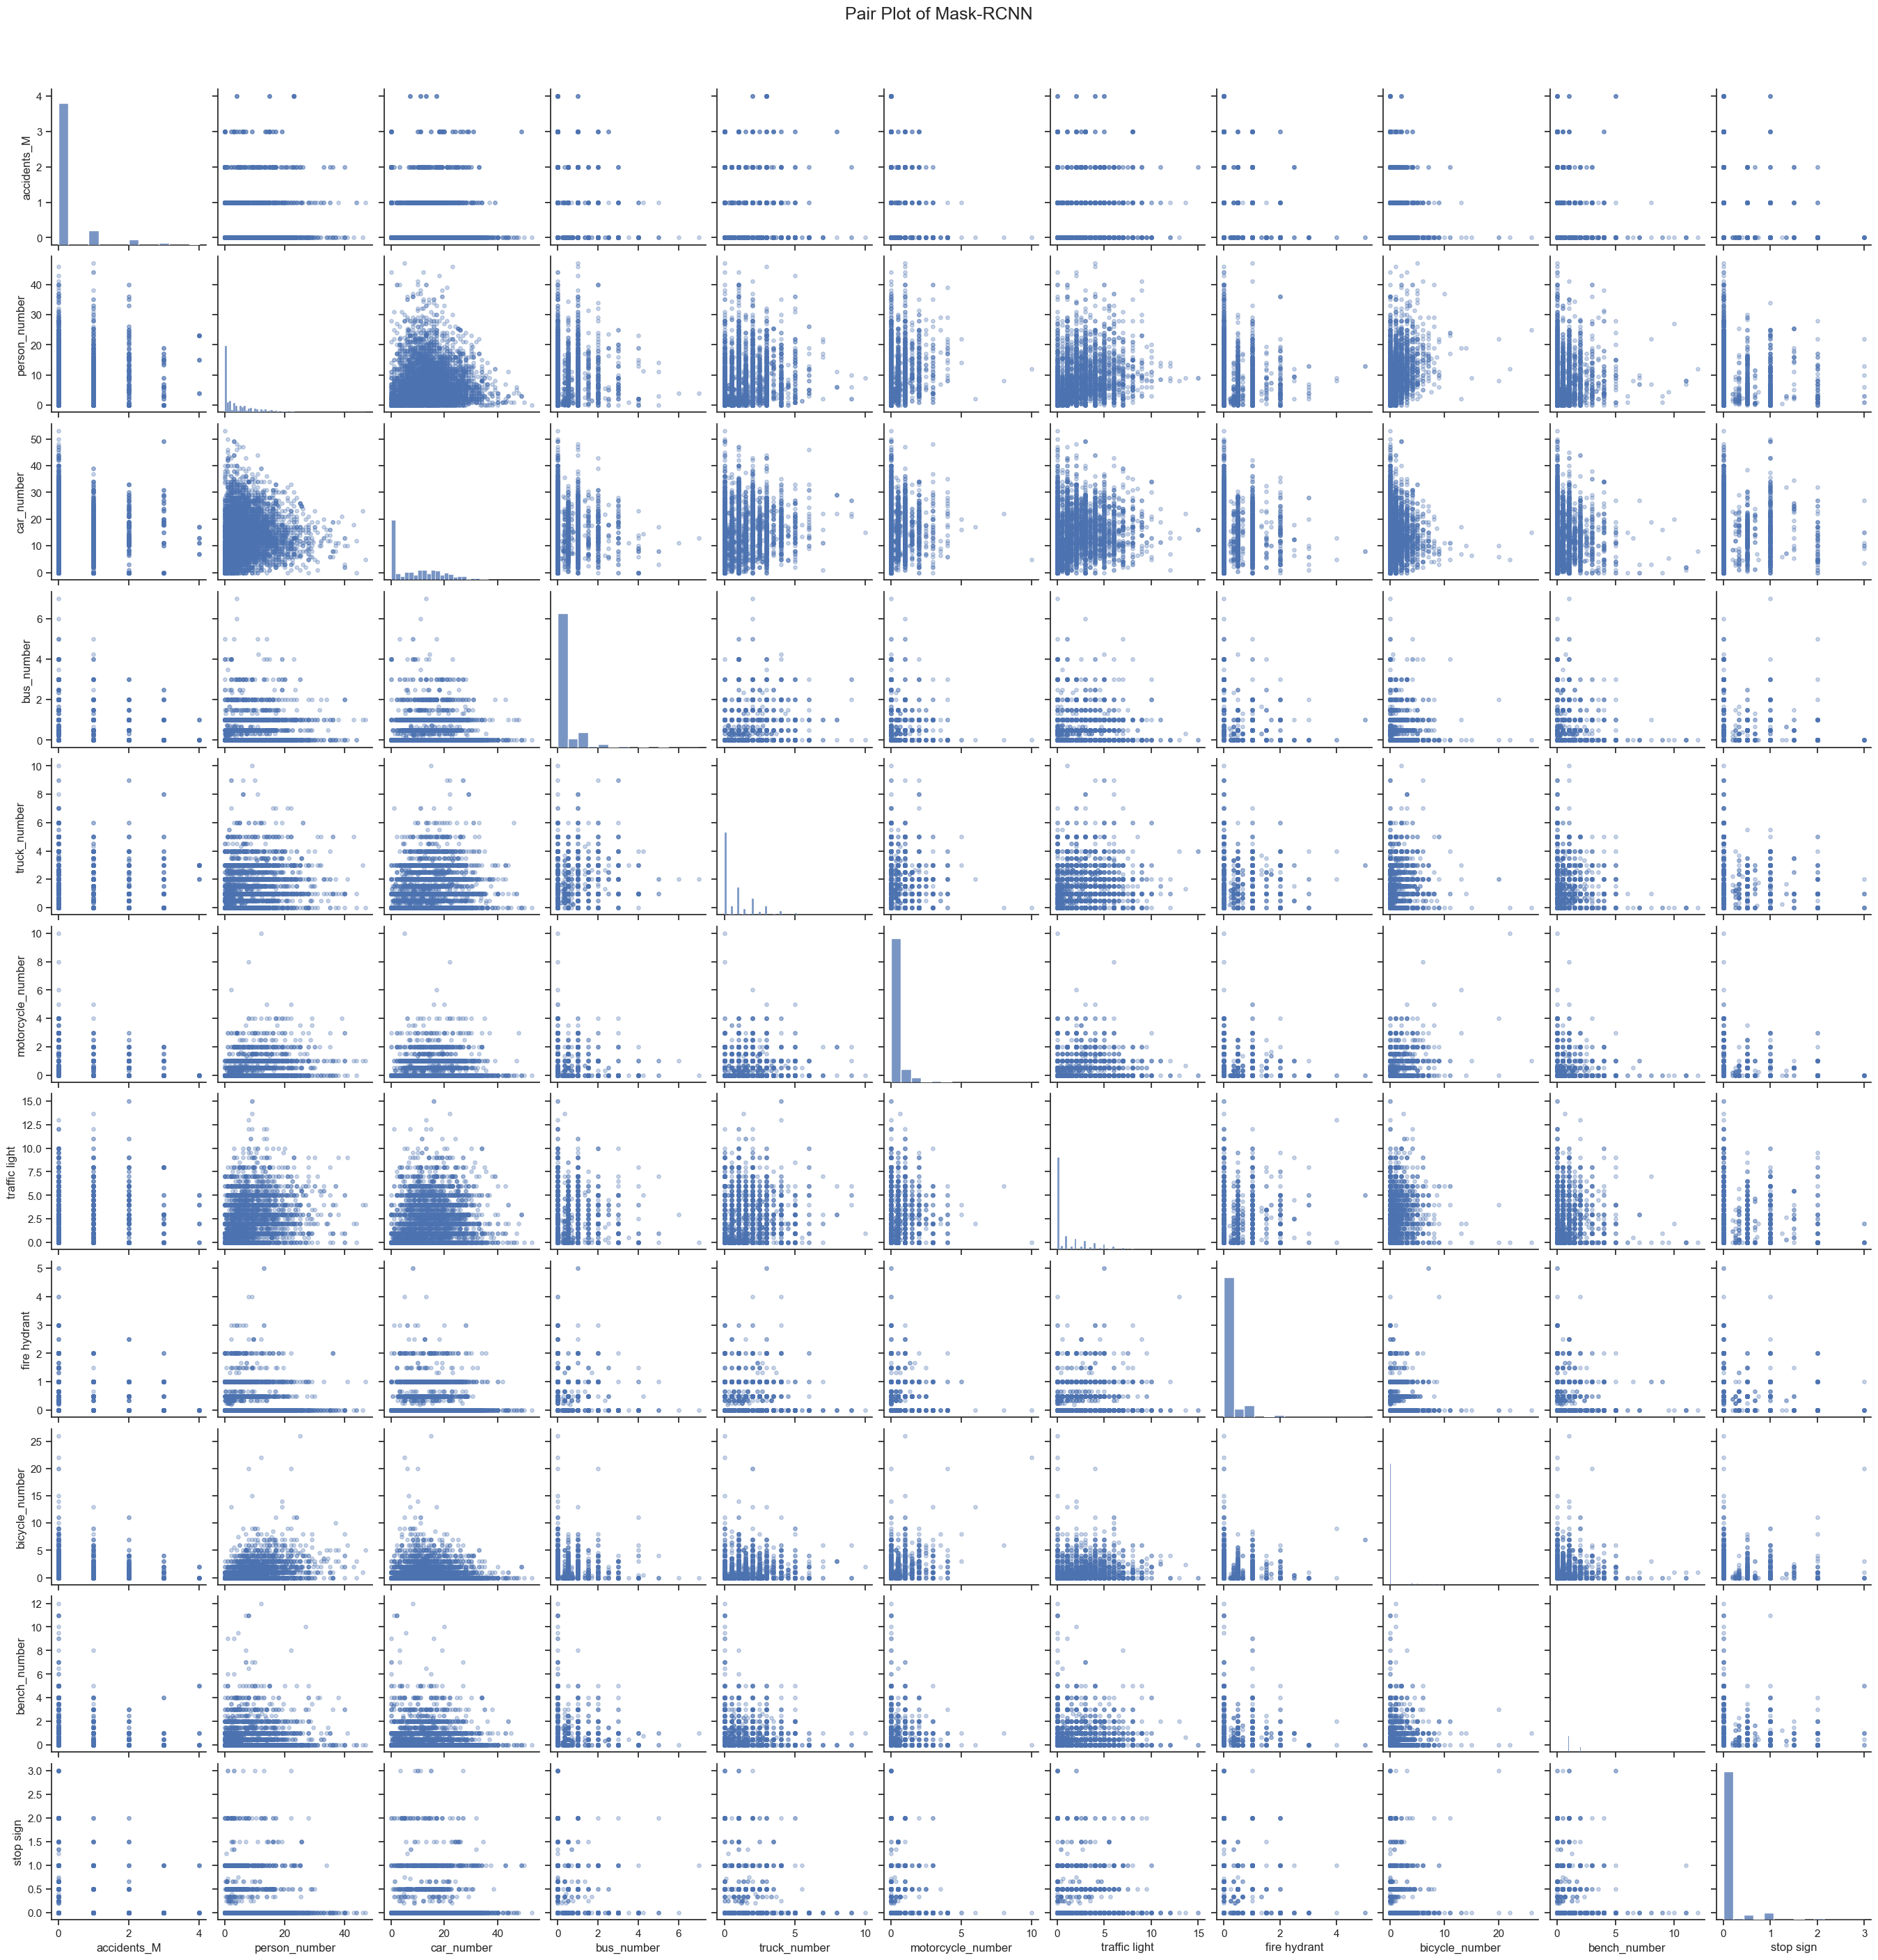

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# 设置样式和加载数据集
sns.set_theme(style="ticks")
# 定义 plot_kws 字典，并将透明度 alpha 设置为 0.5
plot_kws = {"s": 15, "edgecolor": "b", "linewidth": 1, "alpha": 0.3}

# 使用 pairplot() 函数绘制子图，并传入 plot_kws 参数字典
g = sns.pairplot(GSV_CNN, plot_kws=plot_kws,palette="coolwarm")

# 添加标题
plt.suptitle("Pair Plot of Mask-RCNN", y=1.03, fontsize=18)
plt.show()
# 保存图表
# g.savefig("Pair Plot of GSV Mask-RCNN.jpg")


#### PSP Net -Mask RCNN - Landcover

In [10]:
#設定輸入和輸出變數

input_var = ['building', 'sky', 'tree', 'road', 'sidewalk', 'person', 'car', 'skyscraper',
              'streetlight', 'wall', 'fence', 'railing', 'awning', 'signboard', 'ashcan', 'earth', 'van',
              'plant', 'bulletin board', 'minibike', 
             'bridge', 'water', 'person_number', 
              'car_number', 'bus_number', 'truck_number', 'motorcycle_number', 'traffic light', 'fire hydrant', 'bicycle_number', 
              'bench_number',  'stop sign','Tree Canopy Percentage', 'Grass/Shrubs Percentage','Buildings Percentage',
             'Other Impervious Percentage', 'Roads Percentage', 'Railroads Percentage']
# input_var = ['building', 'sky', 'tree', 'road', 'sidewalk', 'person', 'car', 'skyscraper',
#               'streetlight', 'wall', 'fence', 'railing', 'awning', 'signboard', 'ashcan', 'earth', 'van',
#               'plant', 'bulletin board', 'minibike', 
#              'bridge', 'water', 'person_number', 
#               'car_number', 'bus_number', 'truck_number', 'motorcycle_number', 'traffic light', 'fire hydrant', 'bicycle_number', 
#               'bench_number',  'stop sign']
   
   
target_var = 'accidents_M'

In [11]:
#切割數據: test_size=0.25
dataset = GSV.copy()
X_train, X_test, y_train, y_test = train_test_split(GSV[input_var], GSV[target_var], test_size=0.25, random_state=42)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt

model: LGBMRegressor
r2_score: 0.333
mean_absolute_percentage_error: 573699987638885.6
mean_absolute_error: 0.255
Random Forest RMSE: 0.444


c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

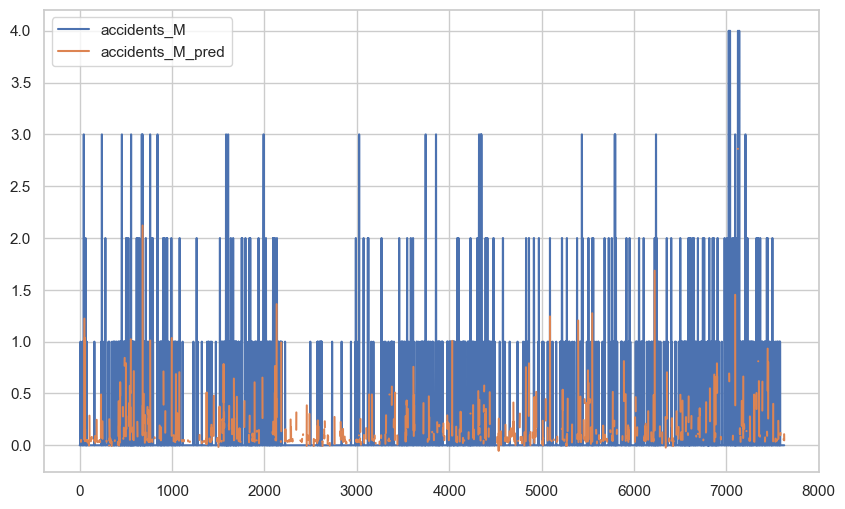

In [80]:
#建立LGBMRegressor model
print('model: LGBMRegressor')
model = lgb.LGBMRegressor(n_estimators=30) 
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
dataset.loc[X_test.index, 'accidents_M_pred'] = y_test_pred

r2 = r2_score(y_test, y_test_pred)
MAPE = mean_absolute_percentage_error(y_test, y_test_pred)
MAE = mean_absolute_error(y_test, y_test_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('r2_score: '+str(round(r2, 3)))
print('mean_absolute_percentage_error: '+str(round(MAPE, 3)))
print('mean_absolute_error: '+str(round(MAE, 3)))
print('Random Forest RMSE: '+str(round(RMSE, 3)))

fig, ax = plt.subplots(figsize=(10, 6))
dataset[['accidents_M','accidents_M_pred']].plot(ax=ax)
plt.savefig('LGBMR model _results.png', dpi=300, bbox_inches='tight')  # 添加此行以保存图像
plt.show()

model: LGBMRegressor
r2_score: 0.282
mean_absolute_percentage_error: inf
mean_absolute_error: 0.272
LGBMRegressor RMSE: 0.461


c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\jzhuang\AppData\Local\Temp\ipykernel_4712\1246313547.py:11: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse

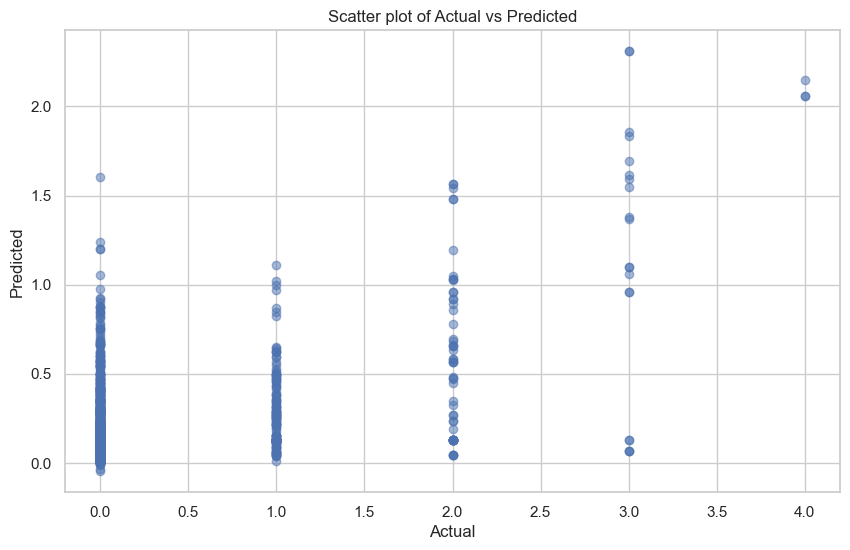

In [51]:
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.utils import check_array
import numpy as np
import pandas as pd

# 定义mean_absolute_percentage_error函数
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# 假设X_train, y_train, X_test, y_test已经定义
# 假设dataset也已经定义，并且具有正确的索引

# 建立LGBMRegressor model
print('model: LGBMRegressor')
model = lgb.LGBMRegressor(n_estimators=30) 
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
dataset.loc[X_test.index, 'accidents_M_pred'] = y_test_pred

r2 = r2_score(y_test, y_test_pred)
MAPE = mean_absolute_percentage_error(y_test, y_test_pred)
MAE = mean_absolute_error(y_test, y_test_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('r2_score: '+str(round(r2, 3)))
print('mean_absolute_percentage_error: '+str(round(MAPE, 3)))
print('mean_absolute_error: '+str(round(MAE, 3)))
print('LGBMRegressor RMSE: '+str(round(RMSE, 3)))  # 修改了这里的print语句

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(dataset['accidents_M'], dataset['accidents_M_pred'], alpha=0.5)  # 修改了这里的plot语句
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.title('Scatter plot of Actual vs Predicted')
plt.savefig('LGBMR model _results.png', dpi=300, bbox_inches='tight')  # 保存图像
plt.show()


model: LGBMRegressor
r2_score: 0.333
mean_absolute_percentage_error: 573699987638885.6
mean_absolute_error: 0.255
LGBMRegressor RMSE: 0.444


c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


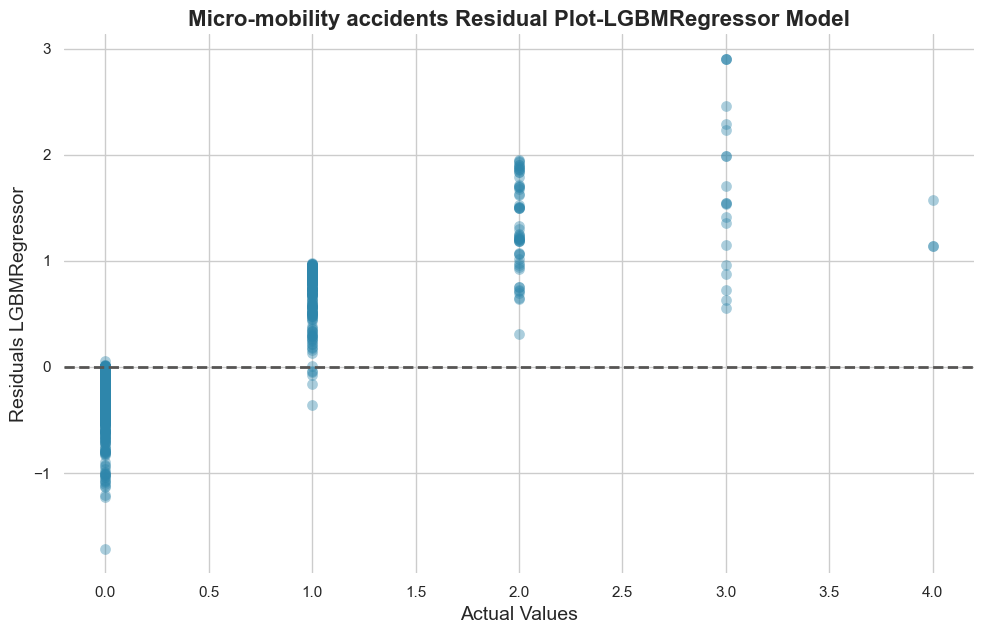

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb
import numpy as np
import pandas as pd

# 定义mean_absolute_percentage_error函数
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# 假设X_train, y_train, X_test, y_test已经定义
# 假设dataset也已经定义，并且具有正确的索引

# 训练模型和评估
print('model: LGBMRegressor')
model = lgb.LGBMRegressor(n_estimators=30) 
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
dataset.loc[X_test.index, 'accidents_M_pred'] = y_test_pred
print('r2_score: '+str(round(r2, 3)))
print('mean_absolute_percentage_error: '+str(round(MAPE, 3)))
print('mean_absolute_error: '+str(round(MAE, 3)))
print('LGBMRegressor RMSE: '+str(round(RMSE, 3)))  
# 残差
residuals = y_test - y_test_pred

# Seaborn settings
sns.set_theme(style="whitegrid")

# 绘制残差图
f, ax = plt.subplots(figsize=(10, 6.5))
sns.despine(f, left=True, bottom=True)

sns.scatterplot(x=y_test, y=residuals, s=60, linewidth=0, ax=ax, color='#2E86AB', alpha=0.4)
 # s 参数用于控制点的大小

ax.axhline(y=0, color='#565554', linestyle='--', linewidth=2)
ax.set_xlabel('Actual Values', fontsize=14)
ax.set_ylabel('Residuals LGBMRegressor', fontsize=14)
ax.set_title('Micro-mobility accidents Residual Plot-LGBMRegressor Model', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


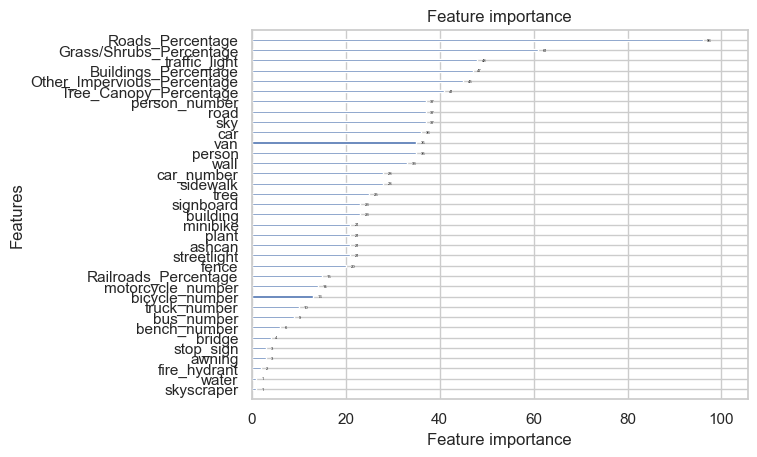

In [43]:
# 輸出特徵的重要性(lightGBM)
lgb.plot_importance(model, ax=None, height=0.2, xlim=None, ylim=None, importance_type='auto')
plt.show()

In [44]:
importance_normalized = np.round((importance / np.sum(importance)), 3)

NameError: name 'importance' is not defined

In [368]:
for i in range(len(importance_normalized)):
    print("Feature {}: importance score = {}".format(i, importance_normalized[i]))

Feature 0: importance score = 0.034
Feature 1: importance score = 0.05
Feature 2: importance score = 0.036
Feature 3: importance score = 0.029
Feature 4: importance score = 0.028
Feature 5: importance score = 0.02
Feature 6: importance score = 0.043
Feature 7: importance score = 0.0
Feature 8: importance score = 0.018
Feature 9: importance score = 0.022
Feature 10: importance score = 0.016
Feature 11: importance score = 0.0
Feature 12: importance score = 0.008
Feature 13: importance score = 0.03
Feature 14: importance score = 0.026
Feature 15: importance score = 0.002
Feature 16: importance score = 0.024
Feature 17: importance score = 0.029
Feature 18: importance score = 0.0
Feature 19: importance score = 0.008
Feature 20: importance score = 0.004
Feature 21: importance score = 0.001
Feature 22: importance score = 0.0
Feature 23: importance score = 0.0
Feature 24: importance score = 0.042
Feature 25: importance score = 0.023
Feature 26: importance score = 0.012
Feature 27: importance s

In [62]:
importance = model.feature_importances_
importance_df = pd.DataFrame({'feature': model.feature_name_, 'importance': importance})
importance_df = importance_df.sort_values(by='importance')

AttributeError: 'GradientBoostingRegressor' object has no attribute 'feature_name_'

In [370]:
importance_df = importance_df.sort_values(by='importance')

In [64]:
importance_df = importance_df.set_index('feature')

NameError: name 'importance_df' is not defined

In [63]:
importance_df['importance'] = (importance_df['importance'] - importance_df['importance'].min()) / \
                              (importance_df['importance'].max() - importance_df['importance'].min())
importance_df = importance_df.round(3)

NameError: name 'importance_df' is not defined

In [65]:
import matplotlib.pyplot as plt

# 设置图像大小和字体大小
plt.figure(figsize=(15, 8))  # 设置图像尺寸，您可以根据需要调整这些值
plt.rcParams.update({'font.size': 3})  # 设置字体大小

importance_df.plot(kind='barh', color='blue', alpha=0.7)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.xlim(0, 1)
plt.savefig('importance_5LL.png', dpi=300, bbox_inches='tight')
plt.show()


NameError: name 'importance_df' is not defined

<Figure size 1500x800 with 0 Axes>

model: svm.SVR


c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

r2_score: -0.009
mean_absolute_error: 0.255
SVM RMSE: 0.547


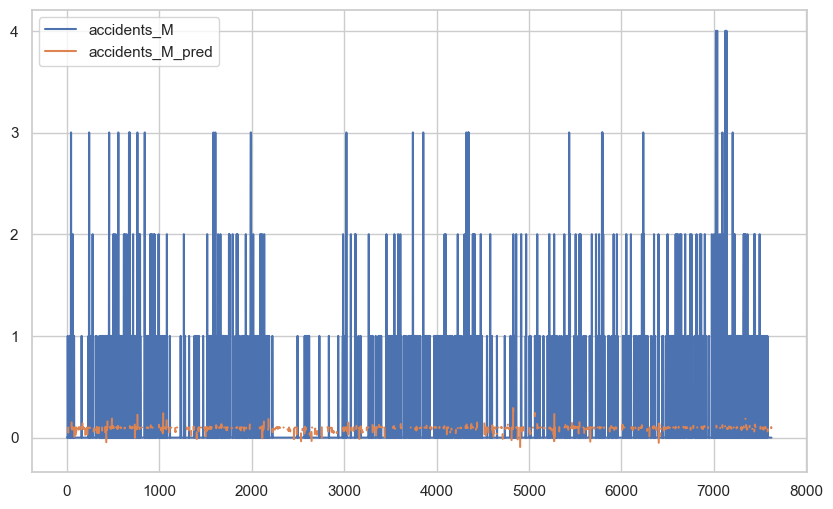

c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


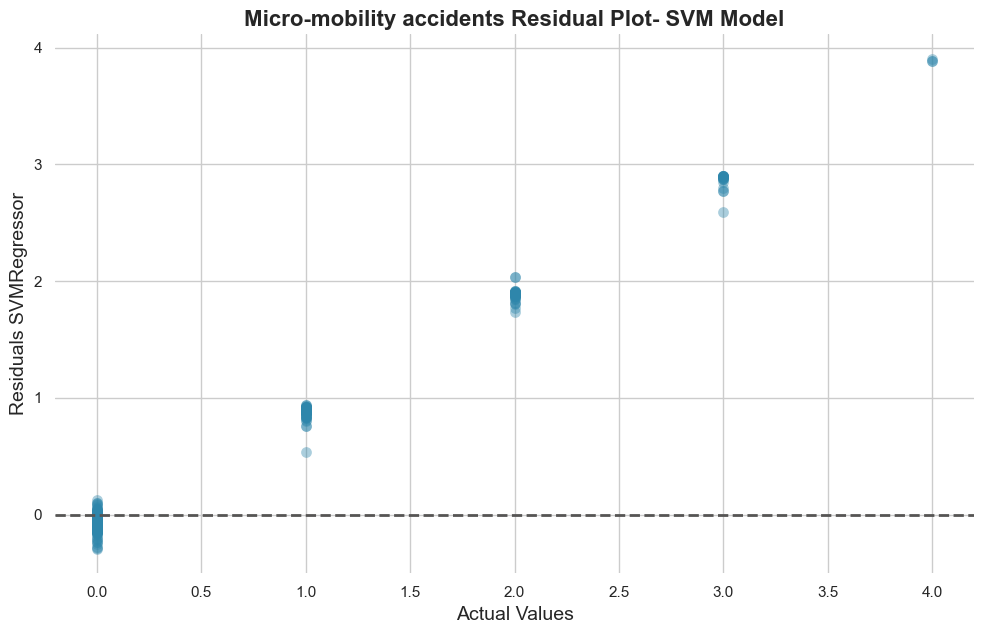

CPU times: total: 2.14 s
Wall time: 2.11 s


In [82]:
%%time
#建立svm model
from sklearn import svm

print('model: svm.SVR')
model = svm.SVR()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
dataset.loc[X_test.index, 'accidents_M_pred'] = y_test_pred

r2 = r2_score(y_test, y_test_pred)
MAE = mean_absolute_error(y_test, y_test_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('r2_score: '+str(round(r2, 3)))
print('mean_absolute_error: '+str(round(MAE, 3)))
print('SVM RMSE: '+str(round(RMSE, 3)))

fig, ax = plt.subplots(figsize=(10, 6))
dataset[['accidents_M','accidents_M_pred']].plot(ax=ax)
plt.savefig('svm model _results.png', dpi=300, bbox_inches='tight')  # 添加此行以保存图像
plt.show()

# 残差
residuals = y_test - y_test_pred

# Seaborn settings
sns.set_theme(style="whitegrid")

# 绘制残差图
f, ax = plt.subplots(figsize=(10, 6.5))
sns.despine(f, left=True, bottom=True)

sns.scatterplot(x=y_test, y=residuals, s=60, linewidth=0, ax=ax, color='#2E86AB', alpha=0.4)
 # s 参数用于控制点的大小

ax.axhline(y=0, color='#565554', linestyle='--', linewidth=2)
ax.set_xlabel('Actual Values', fontsize=14)
ax.set_ylabel('Residuals SVMRegressor', fontsize=14)
ax.set_title('Micro-mobility accidents Residual Plot- SVM Model', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()



c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

r2_score: 0.535
mean_absolute_percentage_error: 547776577644775.44
mean_absolute_error: 0.218
Random Forest RMSE: 0.371


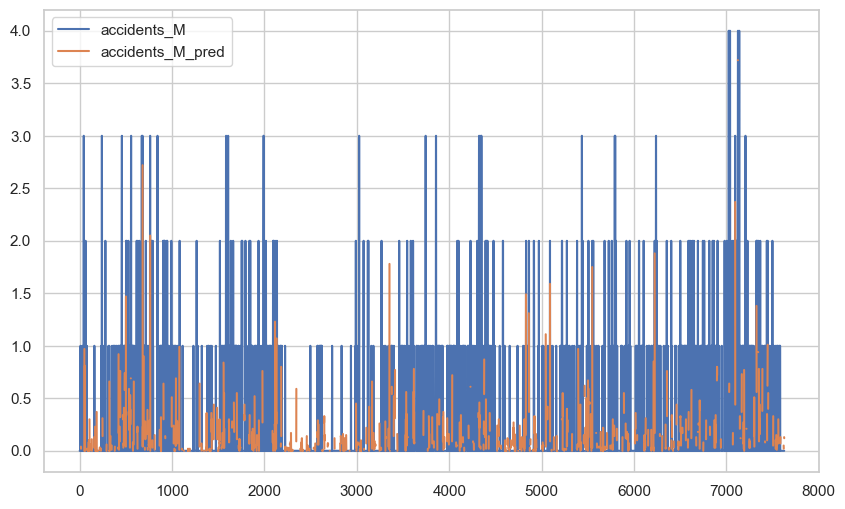

c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


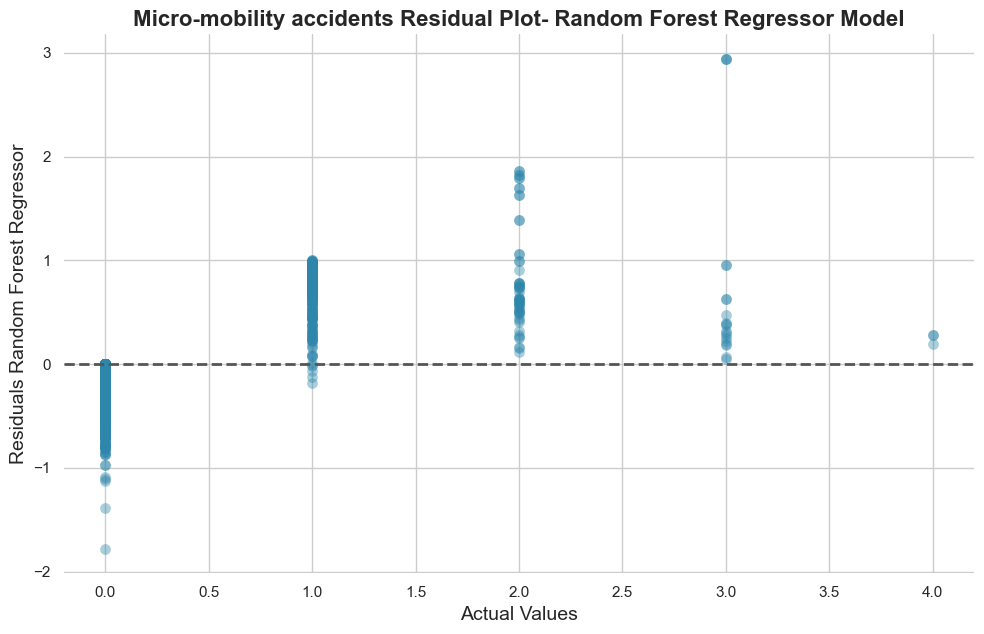

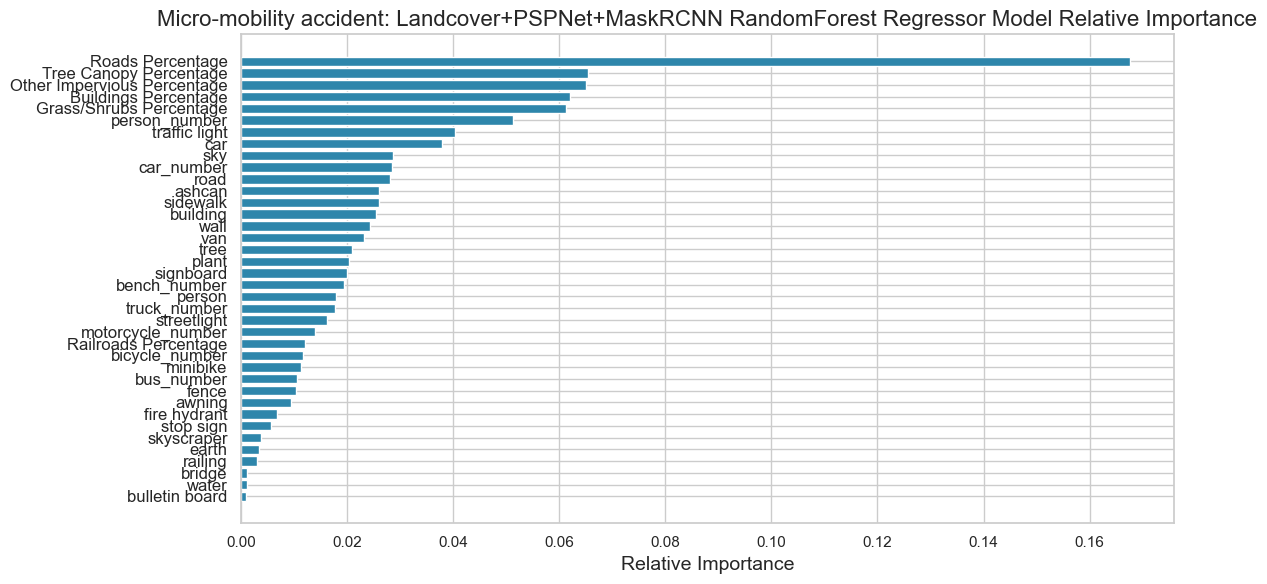

CPU times: total: 10.8 s
Wall time: 10.9 s


In [15]:
%%time
##建立RamdomForestRegressor model  速度慢但效果出众
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
dataset.loc[X_test.index, 'accidents_M_pred'] = y_test_pred

r2 = r2_score(y_test, y_test_pred)
MAPE = mean_absolute_percentage_error(y_test, y_test_pred)
MAE = mean_absolute_error(y_test, y_test_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('r2_score: '+str(round(r2, 3)))
print('mean_absolute_percentage_error: '+str(round(MAPE, 3)))
print('mean_absolute_error: '+str(round(MAE, 3)))
print('Random Forest RMSE: '+str(round(RMSE, 3)))


fig, ax = plt.subplots(figsize=(10, 6))
dataset[['accidents_M','accidents_M_pred']].plot(ax=ax)
plt.savefig('RamdomForest model _results.png', dpi=300, bbox_inches='tight')  # 添加此行以保存图像
plt.show()

# 残差
residuals = y_test - y_test_pred

# Seaborn settings
sns.set_theme(style="whitegrid")

# 绘制残差图
f, ax = plt.subplots(figsize=(10, 6.5))
sns.despine(f, left=True, bottom=True)

sns.scatterplot(x=y_test, y=residuals, s=60, linewidth=0, ax=ax, color='#2E86AB', alpha=0.4)
 # s 参数用于控制点的大小

ax.axhline(y=0, color='#565554', linestyle='--', linewidth=2)
ax.set_xlabel('Actual Values', fontsize=14)
ax.set_ylabel('Residuals Random Forest Regressor', fontsize=14)
ax.set_title('Micro-mobility accidents Residual Plot- Random Forest Regressor Model', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()



# 获取特征的重要性
feature_importances = model.feature_importances_

# 为了使条形图有序，我们可以对特征的重要性进行排序
sorted_idx = np.argsort(feature_importances)

# 绘制特征重要性图
plt.figure(figsize=(12, 6))
plt.title("Micro-mobility accident: Landcover+PSPNet+MaskRCNN RandomForest Regressor Model Relative Importance", fontsize=16)
plt.barh(range(X_train.shape[1]), feature_importances[sorted_idx], align="center", color='#2E86AB')
plt.yticks(range(X_train.shape[1]), X_train.columns[sorted_idx], fontsize=12)
plt.xlabel("Relative Importance", fontsize=14)
plt.tight_layout()
plt.show()

c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

r2_score: 0.061
mean_absolute_percentage_error: nan
mean_absolute_error: 0.236
Random Forest RMSE: 0.528


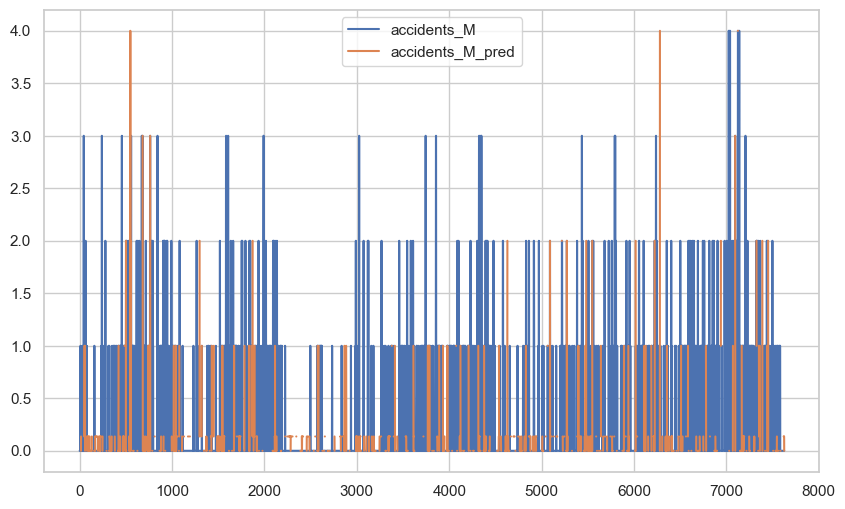

c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


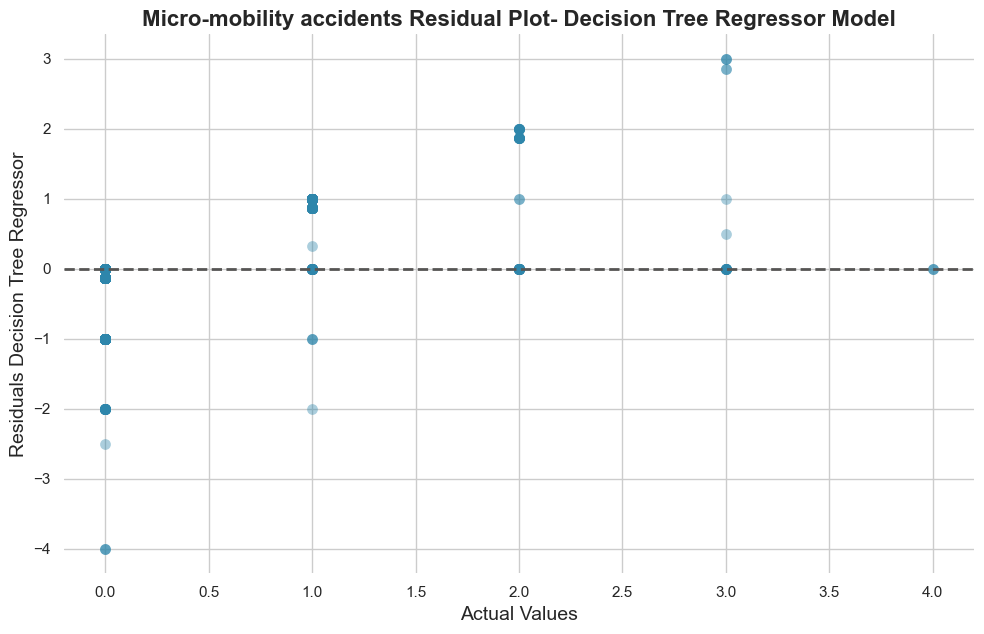

CPU times: total: 1.14 s
Wall time: 1.15 s


In [68]:
%%time
##建立Decision Tree model  
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
dataset.loc[X_test.index, 'accidents_M_pred'] = y_test_pred

r2 = r2_score(y_test, y_test_pred)
MAPE = mean_absolute_percentage_error(y_test, y_test_pred)
MAE = mean_absolute_error(y_test, y_test_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('r2_score: '+str(round(r2, 3)))
print('mean_absolute_percentage_error: '+str(round(MAPE, 3)))
print('mean_absolute_error: '+str(round(MAE, 3)))
print('Random Forest RMSE: '+str(round(RMSE, 3)))

fig, ax = plt.subplots(figsize=(10, 6))
dataset[['accidents_M','accidents_M_pred']].plot(ax=ax)
plt.savefig('Decision Tree model _results.png', dpi=300, bbox_inches='tight')  # 添加此行以保存图像
plt.show()

# 绘制残差图
f, ax = plt.subplots(figsize=(10, 6.5))
sns.despine(f, left=True, bottom=True)

sns.scatterplot(x=y_test, y=residuals, s=60, linewidth=0, ax=ax, color='#2E86AB', alpha=0.4)
 # s 参数用于控制点的大小

ax.axhline(y=0, color='#565554', linestyle='--', linewidth=2)
ax.set_xlabel('Actual Values', fontsize=14)
ax.set_ylabel('Residuals Random Forest Regressor', fontsize=14)
ax.set_title('Micro-mobility accidents Residual Plot- Decision Tree Regressor Model', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

r2_score: 0.231
mean_absolute_percentage_error: inf
mean_absolute_error: 0.284
Random Forest RMSE: 0.477


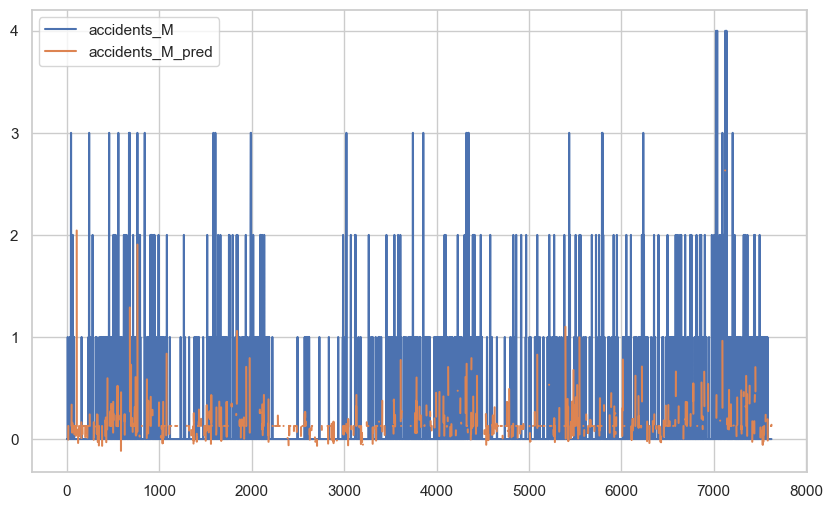

c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


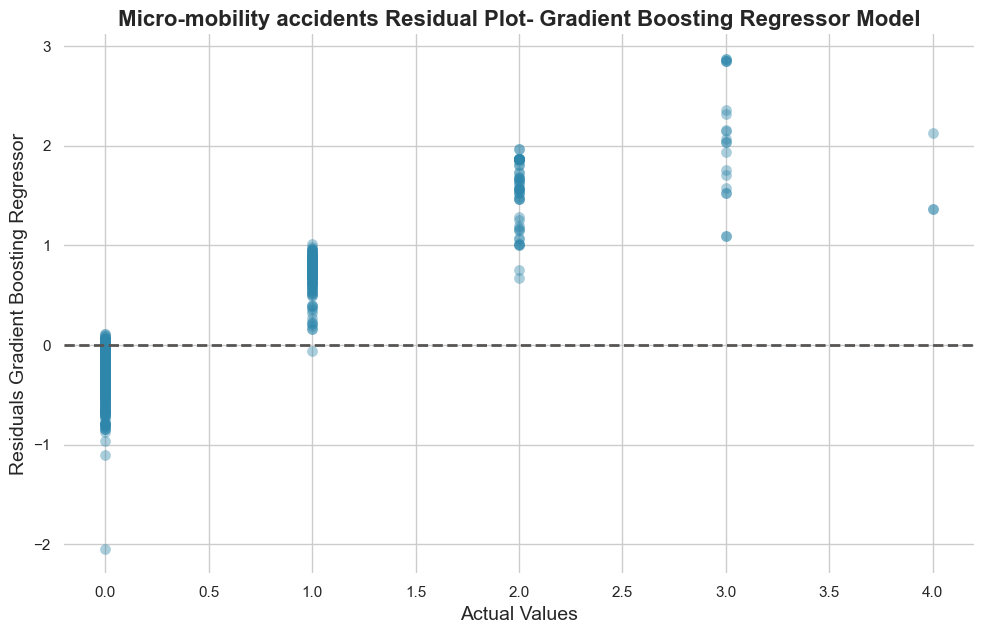

CPU times: total: 2.78 s
Wall time: 2.78 s


In [60]:
%%time
##建立Gradient Boosting e model  
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
dataset.loc[X_test.index, 'accidents_M_pred'] = y_test_pred

r2 = r2_score(y_test, y_test_pred)
MAPE = mean_absolute_percentage_error(y_test, y_test_pred)
MAE = mean_absolute_error(y_test, y_test_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('r2_score: '+str(round(r2, 3)))
print('mean_absolute_percentage_error: '+str(round(MAPE, 3)))
print('mean_absolute_error: '+str(round(MAE, 3)))
print('Random Forest RMSE: '+str(round(RMSE, 3)))

fig, ax = plt.subplots(figsize=(10, 6))
dataset[['accidents_M','accidents_M_pred']].plot(ax=ax)
plt.savefig('gradient_boosting_results.png', dpi=300, bbox_inches='tight')  # 添加此行以保存图像
plt.show()

# 残差
residuals = y_test - y_test_pred

# 绘制残差图
f, ax = plt.subplots(figsize=(10, 6.5))
sns.despine(f, left=True, bottom=True)

sns.scatterplot(x=y_test, y=residuals, s=60, linewidth=0, ax=ax, color='#2E86AB', alpha=0.4)
 # s 参数用于控制点的大小

ax.axhline(y=0, color='#565554', linestyle='--', linewidth=2)
ax.set_xlabel('Actual Values', fontsize=14)
ax.set_ylabel('Residuals Gradient Boosting Regressor', fontsize=14)
ax.set_title('Micro-mobility accidents Residual Plot- Gradient Boosting Regressor Model', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

KNN r2_score: 0.083
KNN mean_absolute_percentage_error: nan
KNN mean_absolute_error: 0.239
KNN RMSE: 0.521


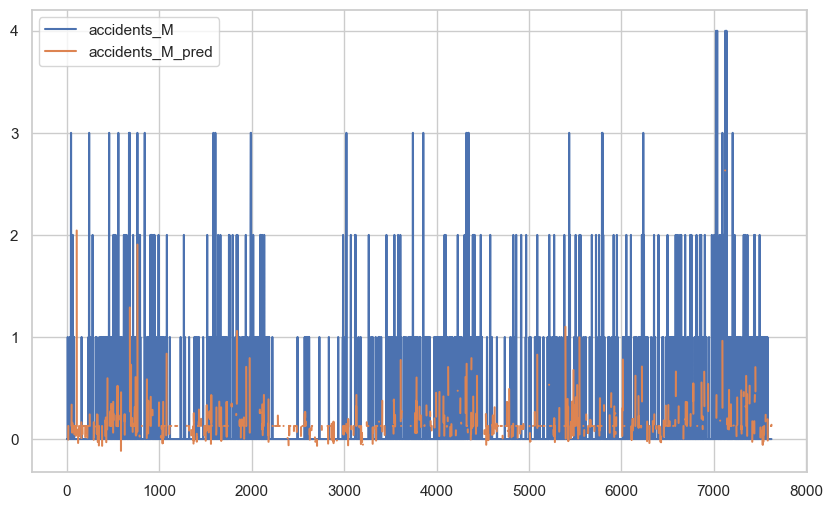

c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jzhuang\AppData\Local\miniconda3\envs\urbanML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


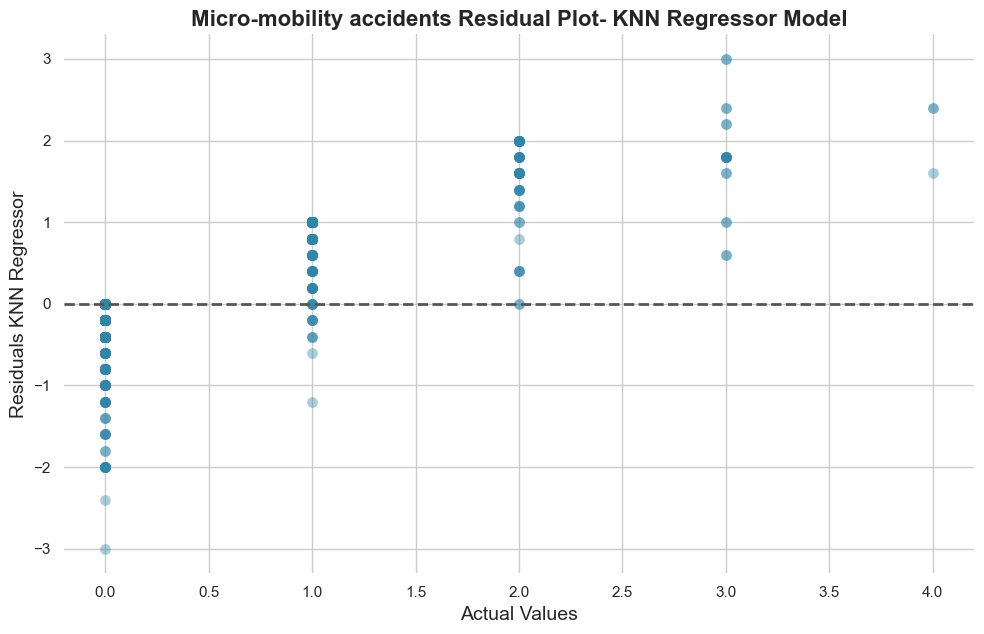

CPU times: total: 2.25 s
Wall time: 1.01 s


In [61]:
%%time
##KNN model
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
y_test_pred_knn = knn_model.predict(X_test)
dataset.loc[X_test.index, 'accidents_M_pred_knn'] = y_test_pred_knn

r2_knn = r2_score(y_test, y_test_pred_knn)
MAPE_knn = mean_absolute_percentage_error(y_test, y_test_pred_knn)
MAE_knn = mean_absolute_error(y_test, y_test_pred_knn)
RMSE_knn = np.sqrt(mean_squared_error(y_test, y_test_pred_knn))

print('KNN r2_score: '+str(round(r2_knn, 3)))
print('KNN mean_absolute_percentage_error: '+str(round(MAPE_knn, 3)))
print('KNN mean_absolute_error: '+str(round(MAE_knn, 3)))
print('KNN RMSE: '+str(round(RMSE_knn, 3)))

fig, ax = plt.subplots(figsize=(10, 6))
dataset[['accidents_M','accidents_M_pred']].plot(ax=ax)
plt.savefig('knn_results.png', dpi=300, bbox_inches='tight') # 添加此行以保存图像
plt.show()

# 残差
residuals = y_test - y_test_pred_knn

# 绘制残差图
f, ax = plt.subplots(figsize=(10, 6.5))
sns.despine(f, left=True, bottom=True)

sns.scatterplot(x=y_test, y=residuals, s=60, linewidth=0, ax=ax, color='#2E86AB', alpha=0.4)
 # s 参数用于控制点的大小

ax.axhline(y=0, color='#565554', linestyle='--', linewidth=2)
ax.set_xlabel('Actual Values', fontsize=14)
ax.set_ylabel('Residuals KNN Regressor', fontsize=14)
ax.set_title('Micro-mobility accidents Residual Plot- KNN Regressor Model', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()